# **Energy Data Sorce : https://cea.nic.in/dashboard/?lang=en**

# **Data : month and year , Peak energy demand,,Peak energy that was met**

# **Energy unit -  MU (Million Unit ie.,  gigawatt-hour)**

----------------------------------------------------------------------------------------------------------------------------------------

# **Temp data source : https://www.data.gov.in/catalog/all-india-seasonal-and-annual-temperature-series**

# **Data : Month , Temperature**

# **Forecast for next two years and use in model**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import copy

from prophet import  Prophet

In [37]:
India_Power_demand_peak=pd.read_csv(r'C:\\Users\\SS5891\\OneDrive - Hitachi Energy\\Desktop\\Intern\\Transformer work\\power-supply-position-pe.csv')
India_Power_demand_peak.head()

,Category,Peak Demand,Peak Met
0,All India<br>Jan-2020,171592.173352,170976.085205
1,All India<br>Jan-2020,171592.173352,170976.085205
2,All India<br>Feb-2020,179098.259477,176387.563477
3,All India<br>Feb-2020,179098.259477,176387.563477
4,All India<br>Mar-2020,170748.586297,170164.931030


In [38]:
India_Power_demand_peak.shape

(62, 3)

In [39]:
India_Power_demand_peak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category     62 non-null     object 
 1   Peak Demand  62 non-null     float64
 2   Peak Met     62 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [40]:
India_Power_demand_peak.describe()

,Peak Demand,Peak Met
count,62.000000,62.000000
mean,197222.114271,195854.319411
std,22952.752734,22856.459153
min,133200.290550,132733.183350
25%,180492.858431,177494.034729
50%,195303.878673,194407.006958
75%,212504.763507,210485.369385
max,249856.325994,249854.335327


In [41]:
India_Power_demand_peak.shape[0]

62

In [42]:
India_Power_demand_peak['Date']=""

for i in range(0,India_Power_demand_peak.shape[0]):
  #print(India_Power_demand_peak.Category[i].split(">")[1].strip())
  India_Power_demand_peak['Date'][i]=India_Power_demand_peak.Category[i].split(">")[1].strip()


India_Power_demand_peak.head()

,Category,Peak Demand,Peak Met,Date
0,All India<br>Jan-2020,171592.173352,170976.085205,Jan-2020
1,All India<br>Jan-2020,171592.173352,170976.085205,Jan-2020
2,All India<br>Feb-2020,179098.259477,176387.563477,Feb-2020
3,All India<br>Feb-2020,179098.259477,176387.563477,Feb-2020
4,All India<br>Mar-2020,170748.586297,170164.931030,Mar-2020


In [43]:
India_Power_demand_peak.drop('Category',axis=1,inplace=True)
India_Power_demand_peak.head()

,Peak Demand,Peak Met,Date
0,171592.173352,170976.085205,Jan-2020
1,171592.173352,170976.085205,Jan-2020
2,179098.259477,176387.563477,Feb-2020
3,179098.259477,176387.563477,Feb-2020
4,170748.586297,170164.931030,Mar-2020


In [44]:
India_Power_demand_peak.Date=pd.to_datetime(India_Power_demand_peak.Date)
India_Power_demand_peak.head()

,Peak Demand,Peak Met,Date
0,171592.173352,170976.085205,2020-01-01
1,171592.173352,170976.085205,2020-01-01
2,179098.259477,176387.563477,2020-02-01
3,179098.259477,176387.563477,2020-02-01
4,170748.586297,170164.931030,2020-03-01


In [45]:
India_Power_demand_peak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Peak Demand  62 non-null     float64       
 1   Peak Met     62 non-null     float64       
 2   Date         62 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.6 KB


In [46]:
India_Power_demand_peak.duplicated()[India_Power_demand_peak.duplicated()==True]


1     True
3     True
28    True
30    True
32    True
34    True
36    True
38    True
dtype: bool

In [47]:
India_Power_demand_peak.drop_duplicates(inplace=True)
India_Power_demand_peak.shape

(54, 3)

In [48]:
India_Power_demand_peak.duplicated()

0     False
2     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
29    False
31    False
33    False
35    False
37    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
dtype: bool

In [49]:
India_Power_demand_peak.reset_index(drop=True,inplace=True)
India_Power_demand_peak.head()

,Peak Demand,Peak Met,Date
0,171592.173352,170976.085205,2020-01-01
1,179098.259477,176387.563477,2020-02-01
2,170748.586297,170164.931030,2020-03-01
3,133200.290550,132733.183350,2020-04-01
4,166889.674773,166225.394775,2020-05-01


In [50]:
India_Power_demand_peak.head()

,Peak Demand,Peak Met,Date
0,171592.173352,170976.085205,2020-01-01
1,179098.259477,176387.563477,2020-02-01
2,170748.586297,170164.931030,2020-03-01
3,133200.290550,132733.183350,2020-04-01
4,166889.674773,166225.394775,2020-05-01


In [51]:
India_Power_demand_peak['Deficit_power']=India_Power_demand_peak['Peak Demand']-India_Power_demand_peak['Peak Met']
India_Power_demand_peak.head()

,Peak Demand,Peak Met,Date,Deficit_power
0,171592.173352,170976.085205,2020-01-01,616.088147
1,179098.259477,176387.563477,2020-02-01,2710.696000
2,170748.586297,170164.931030,2020-03-01,583.655267
3,133200.290550,132733.183350,2020-04-01,467.107200
4,166889.674773,166225.394775,2020-05-01,664.279997


In [52]:
India_Power_demand_peak['Year']=India_Power_demand_peak.Date.dt.year
India_Power_demand_peak['Month']=India_Power_demand_peak.Date.dt.month
India_Power_demand_peak.head()

,Peak Demand,Peak Met,Date,Deficit_power,Year,Month
0,171592.173352,170976.085205,2020-01-01,616.088147,2020,1
1,179098.259477,176387.563477,2020-02-01,2710.696000,2020,2
2,170748.586297,170164.931030,2020-03-01,583.655267,2020,3
3,133200.290550,132733.183350,2020-04-01,467.107200,2020,4
4,166889.674773,166225.394775,2020-05-01,664.279997,2020,5


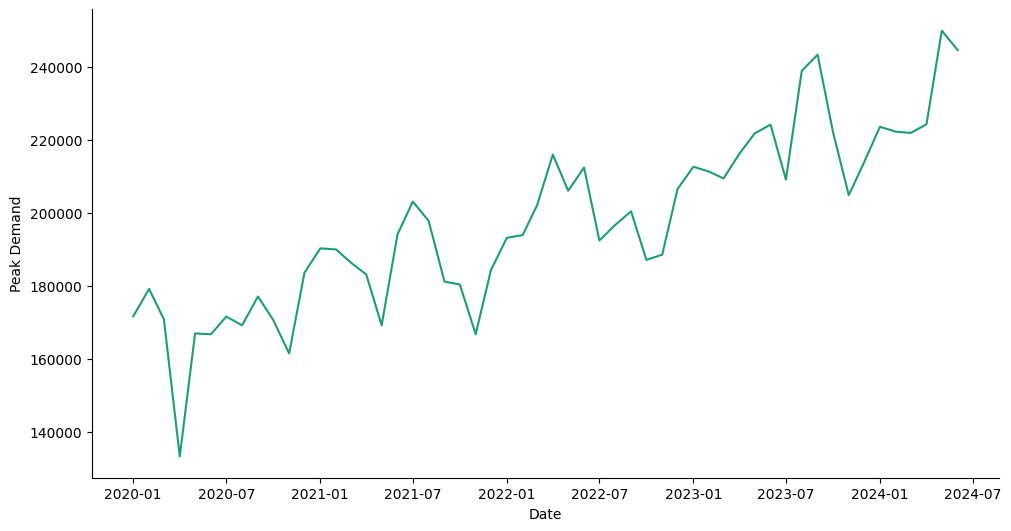

In [53]:
# @title Date vs Peak Demand

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Peak Demand']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = India_Power_demand_peak.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Peak Demand')

In [54]:
import plotly.express as px
fig = px.line(India_Power_demand_peak, x="Date", y='Peak Demand',title="Peak_Demand Trend (MU)")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# **Demand increasing over time**

In [55]:
import plotly.express as px
fig = px.line(India_Power_demand_peak, x="Date", y='Deficit_power',title="Deficit_power Trend (MU)")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [56]:
print("Average power deficit over the 2020-2024 : ",India_Power_demand_peak.Deficit_power.mean()," MU")

Average power deficit over the 2020-2024 :  1219.9757870302274  MU


In [57]:
India_Power_demand_peak["Holiday_Count"]=[1,1,1,4,2,0,0,4,0,3,2,1,1,0,2,4,2,0,1,3,0,3,2,1,1,0,2,2,2,0,1,3,0,4,0,1,1,0,2,4,1,1,1,1,2,2,1,1,1,0,2,4,1,1]
India_Power_demand_peak.head()

,Peak Demand,Peak Met,Date,Deficit_power,Year,Month,Holiday_Count
0,171592.173352,170976.085205,2020-01-01,616.088147,2020,1,1
1,179098.259477,176387.563477,2020-02-01,2710.696000,2020,2,1
2,170748.586297,170164.931030,2020-03-01,583.655267,2020,3,1
3,133200.290550,132733.183350,2020-04-01,467.107200,2020,4,4
4,166889.674773,166225.394775,2020-05-01,664.279997,2020,5,2


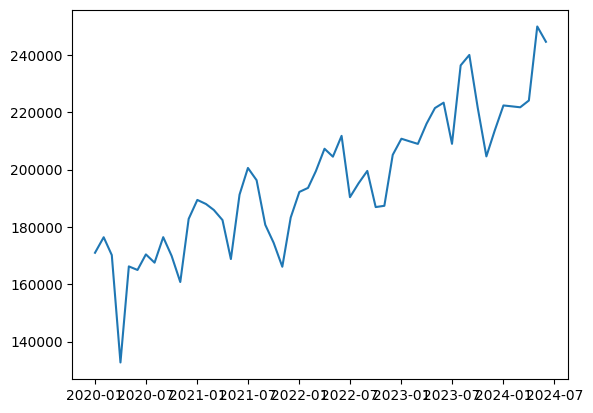

In [58]:
plt.plot(India_Power_demand_peak['Date'], India_Power_demand_peak['Peak Met'])
plt.show()


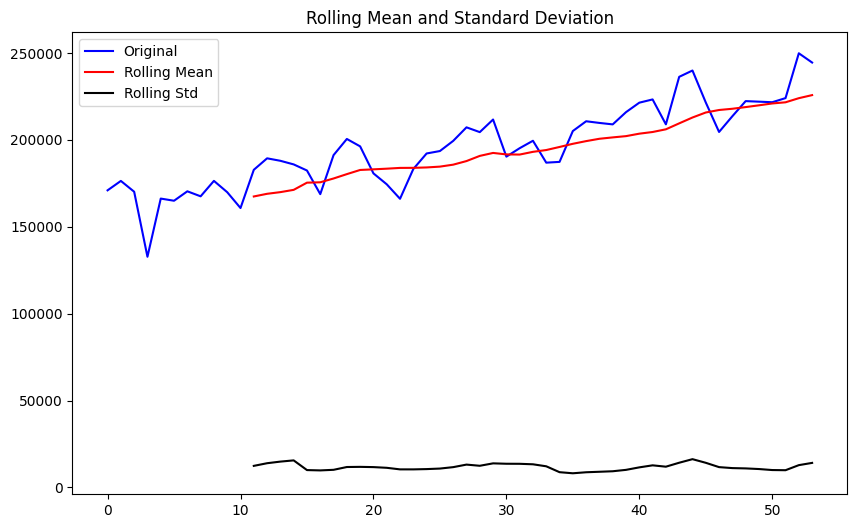

Results of Dickey-Fuller Test:
Test Statistic                  0.215092
p-value                         0.973095
#Lags Used                     11.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64
Performing first-order differencing...


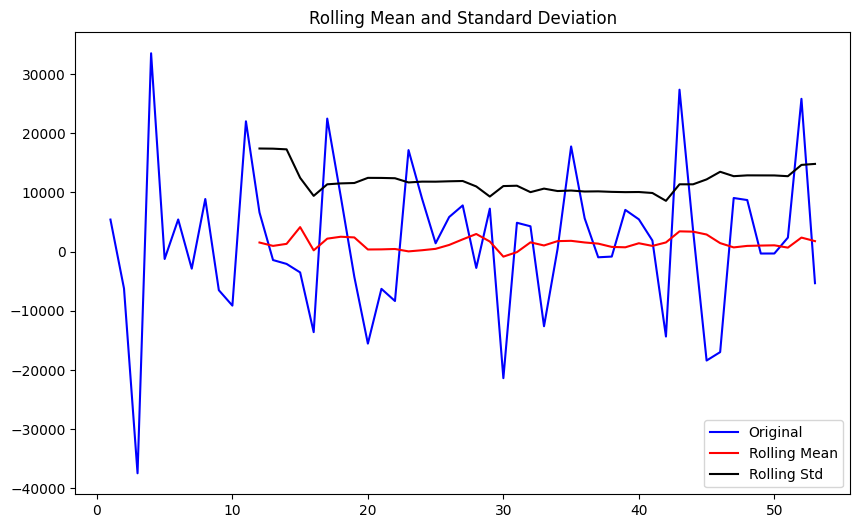

Results of Dickey-Fuller Test:
Test Statistic                 -4.188668
p-value                         0.000689
#Lags Used                     10.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


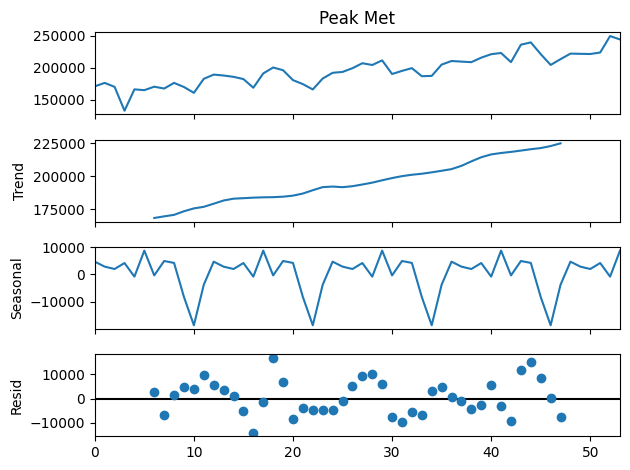

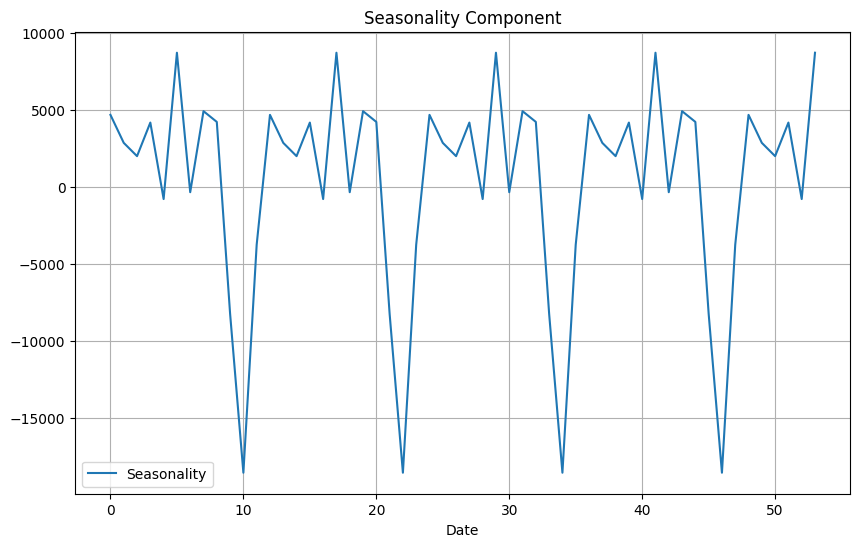

In [59]:
# Peak demand forecast


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose



# === Check Stationarity === #
def check_stationarity(series):
    # Rolling statistics
    rolling_mean = series.rolling(window=12).mean()   # check if mean is not varying
    rolling_std = series.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(series, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.title("Rolling Mean and Standard Deviation")
    plt.legend(loc='best')
    plt.show()

    # Augmented Dickey-Fuller Test
    print("Results of Dickey-Fuller Test:")
    adf_test = adfuller(series, autolag='AIC')
    adf_output = pd.Series(adf_test[:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adf_test[4].items():
        adf_output[f'Critical Value ({key})'] = value
    print(adf_output)


India_Power_demand_peak['Date'],

# Check stationarity of the original data
check_stationarity( India_Power_demand_peak['Peak Met'])

# Differencing if data is non-stationary
if adfuller( India_Power_demand_peak['Peak Met'])[1] > 0.05:
    data_diff =  India_Power_demand_peak['Peak Met'].diff().dropna()
    print("Performing first-order differencing...")
    check_stationarity(data_diff)

# === Check Seasonality === #
decomposition = seasonal_decompose( India_Power_demand_peak['Peak Met'], model='additive', period=12)

# Plot decomposition
decomposition.plot()
plt.show()

# Seasonal, Trend, and Residuals
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

# Plot seasonality
plt.figure(figsize=(10, 6))
plt.plot(seasonal, label="Seasonality")
plt.title("Seasonality Component")
plt.xlabel("Date")
plt.legend()
plt.grid()
plt.show()


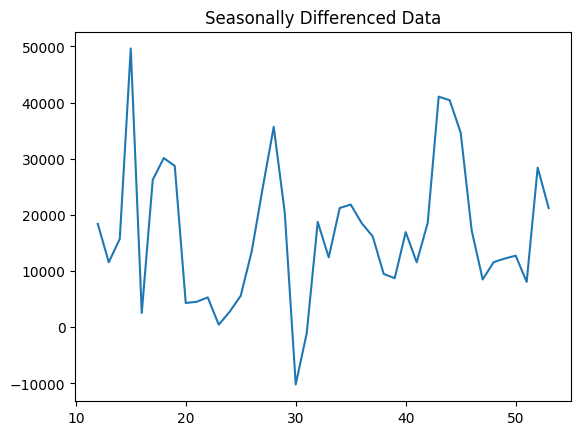

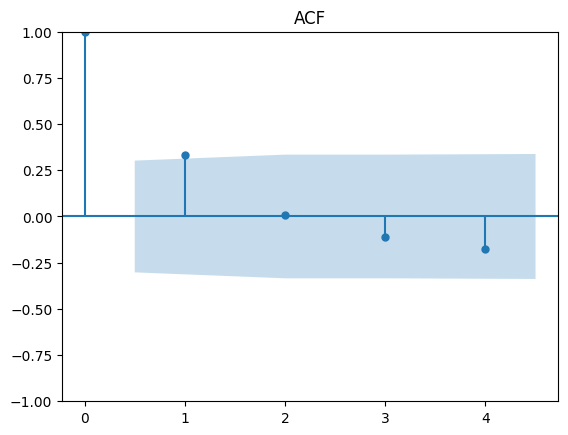

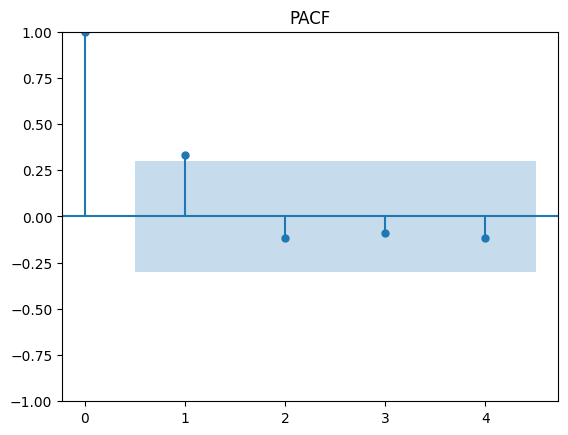

                                     SARIMAX Results                                      
Dep. Variable:                           Peak Met   No. Observations:                   37
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -107.886
Date:                            Tue, 10 Dec 2024   AIC                            225.773
Time:                                    20:38:07   BIC                            227.286
Sample:                                         0   HQIC                           224.113
                                             - 37                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2955      0.863      0.343      0.732      -1.396       1.987
ma.L1         -0.7679      0.237   

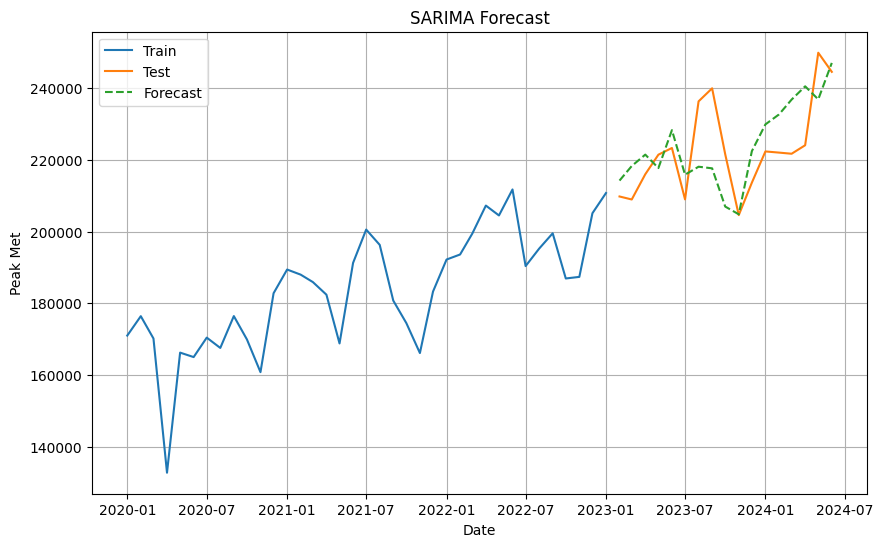

Mean Absolute Error (MAE): 9658.59
Root Mean Squared Error (RMSE): 11341.51
r2: 0.19


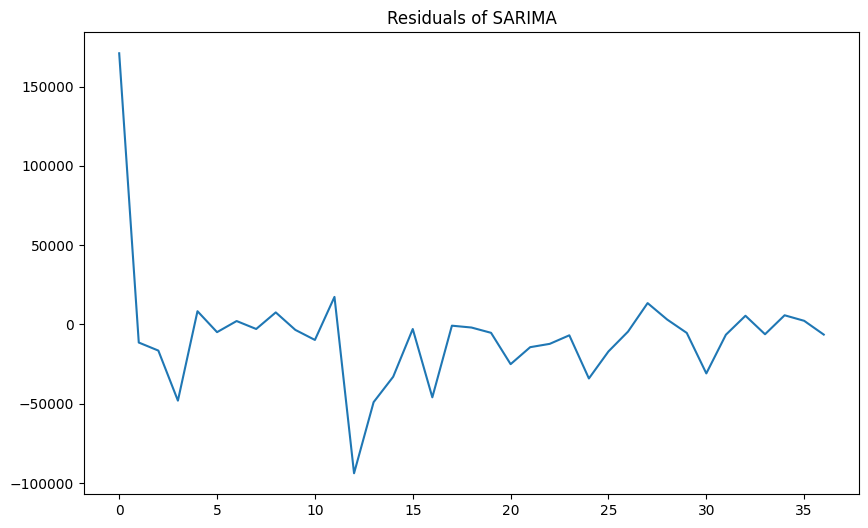

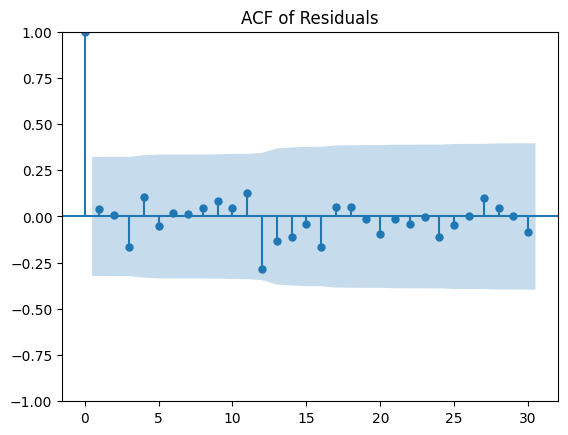

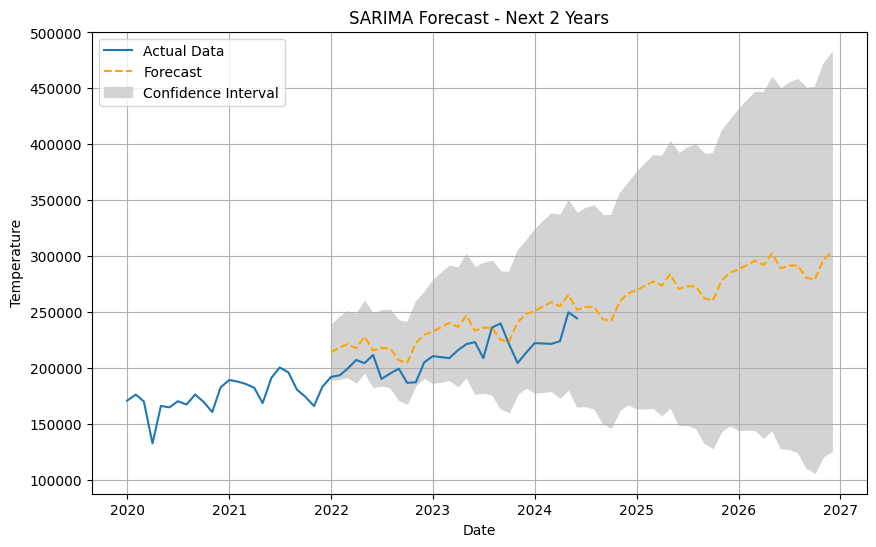

"\n# Print Forecast Values\nforecast_temp = pd.DataFrame({'Date': future_index, 'Temperature': forecast_values})\nprint(forecast_temp)\n"

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Seasonal Differencing
India_Power_demand_peak['Seasonal_Diff'] = India_Power_demand_peak['Peak Met'].diff(12)
India_Power_demand_peak['Seasonal_Diff'].dropna().plot(title="Seasonally Differenced Data")
plt.show()

max_lags = India_Power_demand_peak.shape[1] // 2

# ACF and PACF Plots for p and q determination
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_acf(India_Power_demand_peak['Seasonal_Diff'].dropna(), lags=max_lags)
plt.title("ACF")
plt.show()

plot_pacf(India_Power_demand_peak['Seasonal_Diff'].dropna(), lags=max_lags)
plt.title("PACF")
plt.show()

# Set SARIMA parameters (based on ACF/PACF or trial-and-error)
p, d, q = 1, 1, 1  # Regular ARIMA terms
P, D, Q, m = 1, 1, 1, 12  # Seasonal terms (m=12 for yearly seasonality)

# Train-Test Split
train_size = int(len(India_Power_demand_peak) * 0.7)
train = India_Power_demand_peak.iloc[:train_size]
test = India_Power_demand_peak.iloc[train_size:]

# Fit SARIMA model
model = SARIMAX(train['Peak Met'], 
                order=(p, d, q), 
                seasonal_order=(P, D, Q, m),
                enforce_stationarity=False, 
                enforce_invertibility=False)

sarima_result = model.fit(disp=False)
print(sarima_result.summary())

# Forecast
forecast_steps = len(test)
forecast = sarima_result.forecast(steps=forecast_steps)
forecast_index = test['Date']

# Plot Actual vs Forecast
plt.figure(figsize=(10, 6))
plt.plot(train['Date'], train['Peak Met'], label='Train')
plt.plot(test['Date'], test['Peak Met'], label='Test')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title("SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Peak Met")
plt.grid()
plt.show()

# Evaluate model performance
mae = mean_absolute_error(test['Peak Met'], forecast)
rmse = np.sqrt(mean_squared_error(test['Peak Met'], forecast))
r2=r2_score(test['Peak Met'], forecast)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"r2: {r2:.2f}")

residuals = sarima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals of SARIMA")
plt.show()                         #No patterns in residuals so good. 

plot_acf(residuals, lags=30)
plt.title("ACF of Residuals")
plt.show()

# Set the start of the forecast to January 2022
forecast_start = '2022-01-01'
forecast_steps = 60  # Forecast for 4 years

# Generate the future index starting from January 2022
future_index = pd.date_range(start=forecast_start, periods=forecast_steps, freq='MS')

# Get forecasted values
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()


# Plot Actual and Forecasted Data
plt.figure(figsize=(10, 6))
plt.plot(India_Power_demand_peak['Date'], India_Power_demand_peak['Peak Met'], label='Actual Data')
plt.plot(future_index, forecast_values, label='Forecast', linestyle='--', color='orange')
plt.fill_between(future_index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], 
                 color='lightgrey', label='Confidence Interval')
plt.title("SARIMA Forecast - Next 2 Years")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()

"""
# Print Forecast Values
forecast_temp = pd.DataFrame({'Date': future_index, 'Temperature': forecast_values})
print(forecast_temp)
"""

In [61]:
Temp=pd.read_excel(r'C:\\Users\\SS5891\\OneDrive - Hitachi Energy\\Desktop\\Intern\\Transformer work\\Temperature.xlsx')
Temp.head()

,Date,Temperature
0,2017-01-01,14.02
1,2017-02-01,16.13
2,2017-03-01,19.02
3,2017-04-01,23.01
4,2017-05-01,24.84


In [62]:
Temp['year']=Temp.Date.dt.year
Temp.groupby('year')['Temperature'].sum()  # mean is almost constant so stationary and data is seasonal from plot

year
2017    249.17
2018    246.81
2019    249.98
2020    249.12
2021    250.86
Name: Temperature, dtype: float64

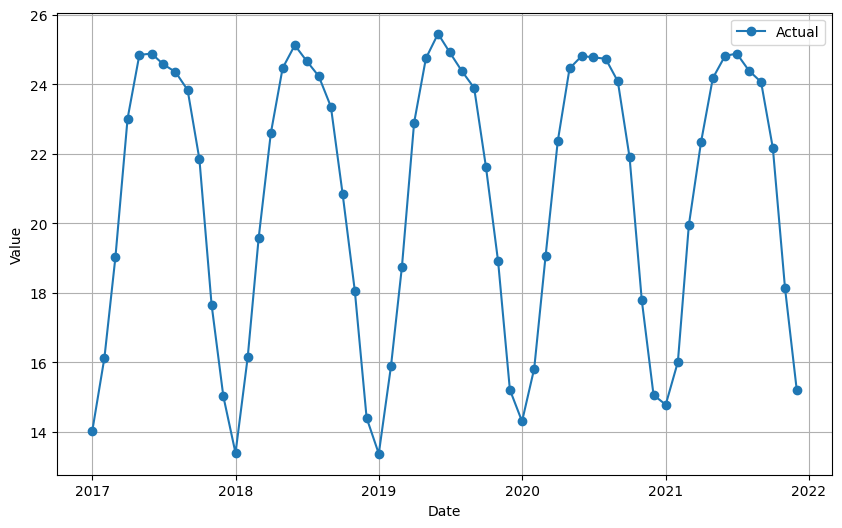

In [63]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(Temp['Date'], Temp['Temperature'], label='Actual', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


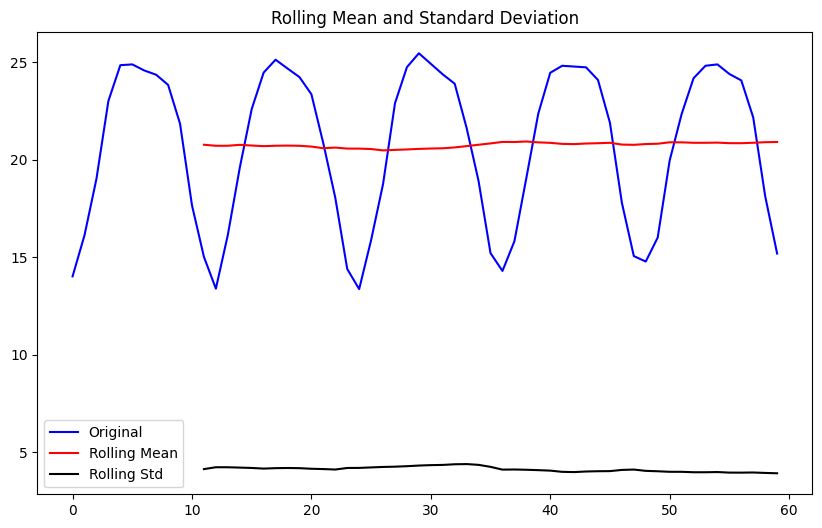

Results of Dickey-Fuller Test:
Test Statistic                 -1.052819
p-value                         0.733516
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64
Performing first-order differencing...


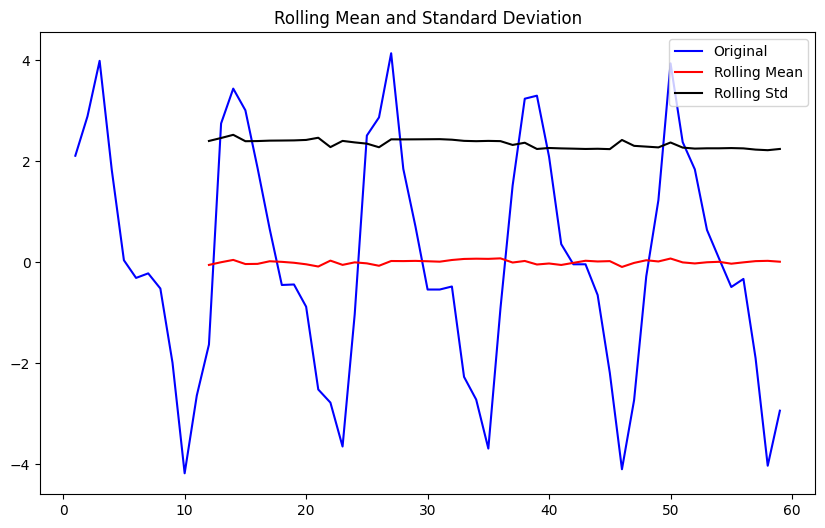

Results of Dickey-Fuller Test:
Test Statistic                -7.371153e+00
p-value                        8.964841e-11
#Lags Used                     1.000000e+01
Number of Observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
Critical Value (5%)           -2.923954e+00
Critical Value (10%)          -2.600039e+00
dtype: float64


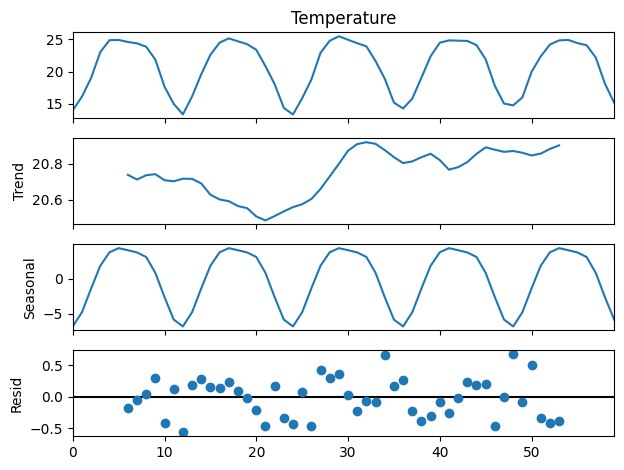

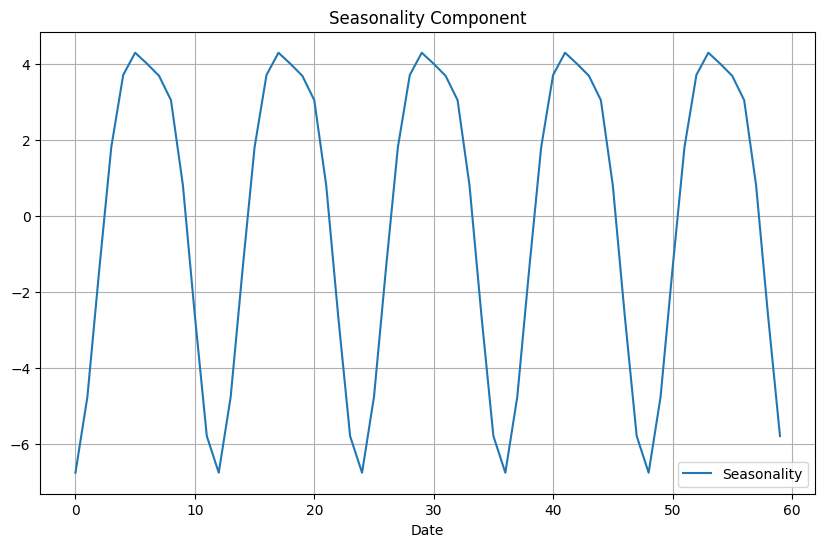

In [64]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


# === Check Stationarity === #
def check_stationarity(series):
    # Rolling statistics
    rolling_mean = series.rolling(window=12).mean()   # check if mean is not varying
    rolling_std = series.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(series, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.title("Rolling Mean and Standard Deviation")
    plt.legend(loc='best')
    plt.show()

    # Augmented Dickey-Fuller Test
    print("Results of Dickey-Fuller Test:")
    adf_test = adfuller(series, autolag='AIC')
    adf_output = pd.Series(adf_test[:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adf_test[4].items():
        adf_output[f'Critical Value ({key})'] = value
    print(adf_output)



# Check stationarity of the original data
check_stationarity(Temp['Temperature'])

# Differencing if data is non-stationary
if adfuller(Temp['Temperature'])[1] > 0.05:
    data_diff = Temp['Temperature'].diff().dropna()
    print("Performing first-order differencing...")
    check_stationarity(data_diff)

# === Check Seasonality === #
decomposition = seasonal_decompose(Temp['Temperature'], model='additive', period=12)

# Plot decomposition
decomposition.plot()
plt.show()

# Seasonal, Trend, and Residuals
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

# Plot seasonality
plt.figure(figsize=(10, 6))
plt.plot(seasonal, label="Seasonality")
plt.title("Seasonality Component")
plt.xlabel("Date")
plt.legend()
plt.grid()
plt.show()


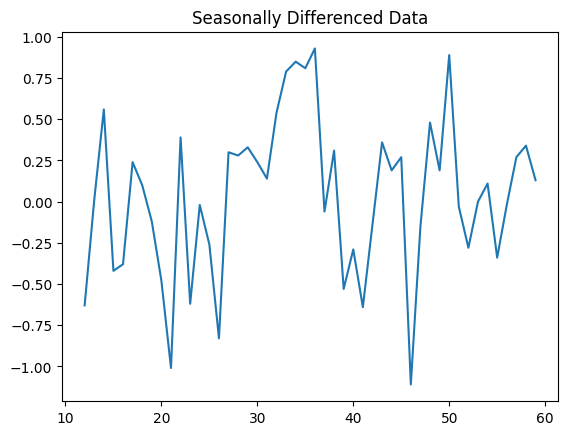

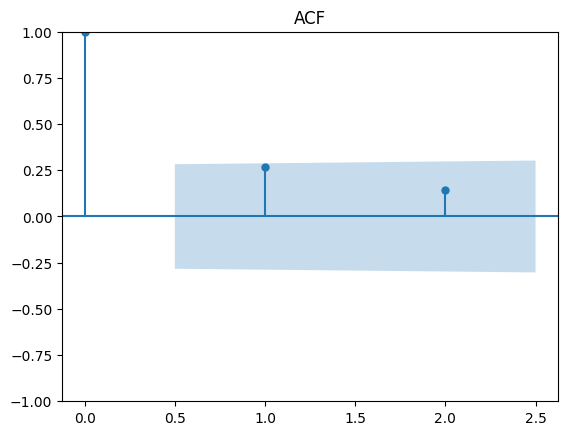

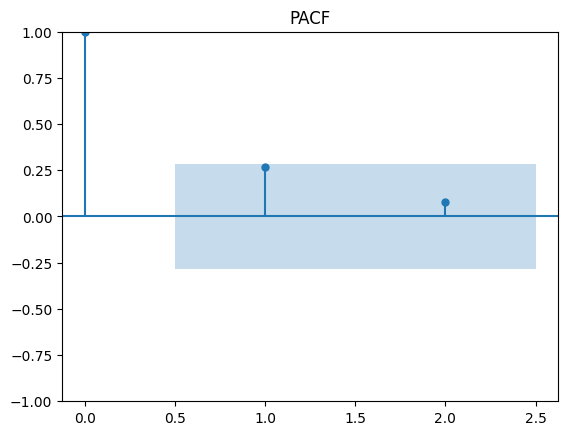

                                     SARIMAX Results                                      
Dep. Variable:                        Temperature   No. Observations:                   42
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  -5.483
Date:                            Tue, 10 Dec 2024   AIC                             20.966
Time:                                    20:38:11   BIC                             24.506
Sample:                                         0   HQIC                            20.928
                                             - 42                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8837      0.321     -2.757      0.006      -1.512      -0.255
ma.L1          0.5234      0.581   

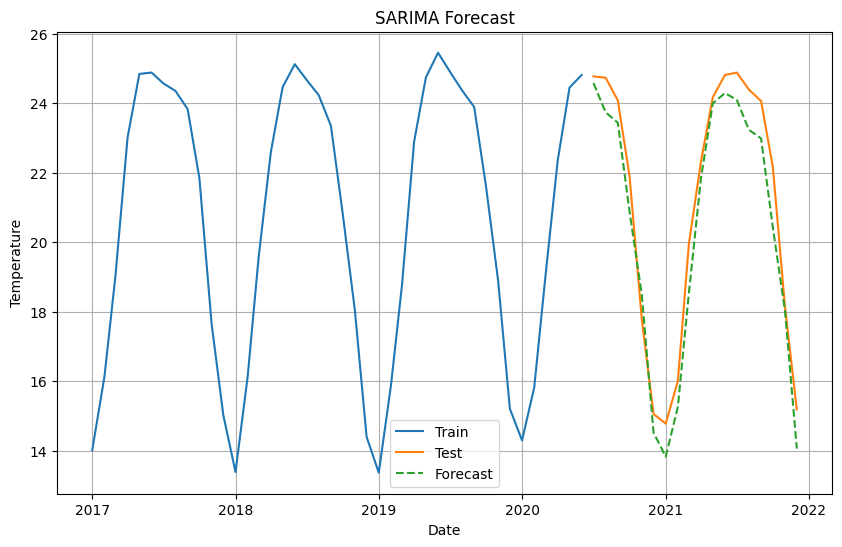

Mean Absolute Error (MAE): 0.80
Root Mean Squared Error (RMSE): 0.90
R2: 0.94


In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Seasonal Differencing
Temp['Seasonal_Diff'] = Temp['Temperature'].diff(12)
Temp['Seasonal_Diff'].dropna().plot(title="Seasonally Differenced Data")
plt.show()

max_lags = Temp.shape[1] // 2

# ACF and PACF Plots for p and q determination
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_acf(Temp['Seasonal_Diff'].dropna(), lags=max_lags)
plt.title("ACF")
plt.show()

plot_pacf(Temp['Seasonal_Diff'].dropna(), lags=max_lags)
plt.title("PACF")
plt.show()

# Set SARIMA parameters (based on ACF/PACF or trial-and-error)
p, d, q = 1, 1, 1  # Regular ARIMA terms
P, D, Q, m = 1, 1, 1, 12  # Seasonal terms (m=12 for yearly seasonality)

# Train-Test Split
train_size = int(len(Temp) * 0.7)
train = Temp.iloc[:train_size]
test = Temp.iloc[train_size:]

# Fit SARIMA model
model = SARIMAX(train['Temperature'], 
                order=(p, d, q), 
                seasonal_order=(P, D, Q, m),
                enforce_stationarity=False, 
                enforce_invertibility=False)

sarima_result = model.fit(disp=False)
print(sarima_result.summary())

# Forecast
forecast_steps = len(test)
forecast = sarima_result.forecast(steps=forecast_steps)
forecast_index = test['Date']

# Plot Actual vs Forecast
plt.figure(figsize=(10, 6))
plt.plot(train['Date'], train['Temperature'], label='Train')
plt.plot(test['Date'], test['Temperature'], label='Test')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title("SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.grid()
plt.show()

# Evaluate model performance
mae = mean_absolute_error(test['Temperature'], forecast)
rmse = np.sqrt(mean_squared_error(test['Temperature'], forecast))
r2=r2_score(test['Temperature'], forecast)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2: {r2:.2f}")

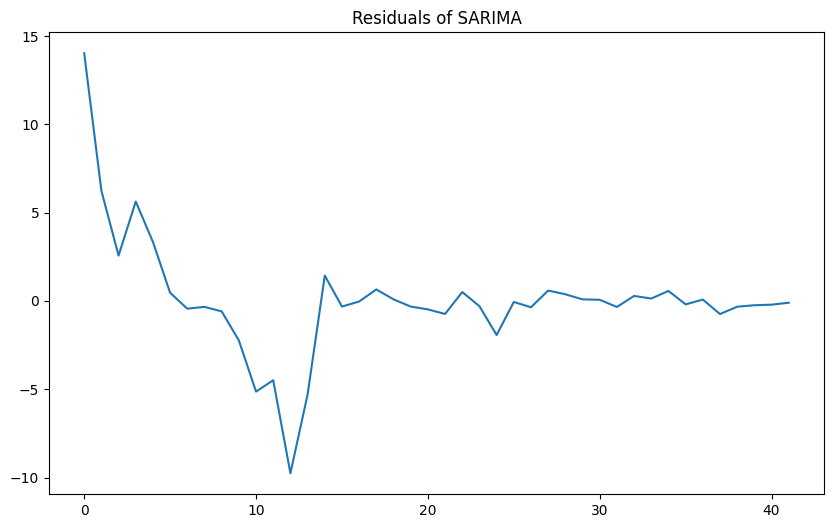

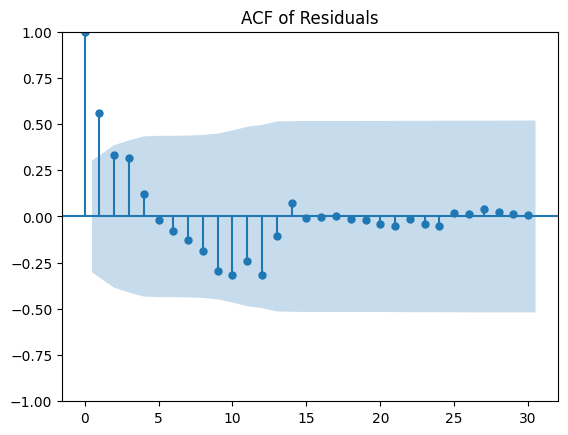

In [66]:
residuals = sarima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals of SARIMA")
plt.show()                         #No patterns in residuals so good. 

plot_acf(residuals, lags=30)
plt.title("ACF of Residuals")
plt.show()


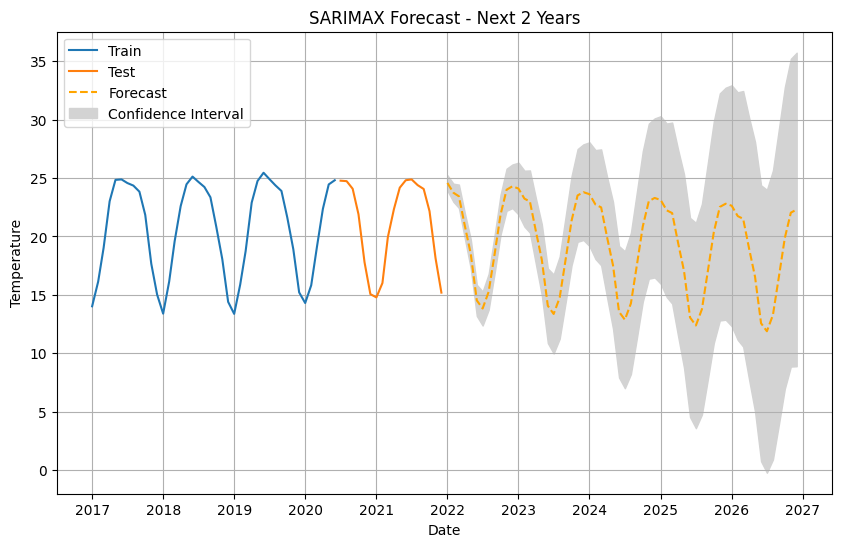

          Date  Temperature
42  2022-01-01    24.577194
43  2022-02-01    23.736051
44  2022-03-01    23.435841
45  2022-04-01    20.866769
46  2022-05-01    18.504646
47  2022-06-01    14.524757
48  2022-07-01    13.830488
49  2022-08-01    15.263403
50  2022-09-01    18.530712
51  2022-10-01    21.856289
52  2022-11-01    23.994921
53  2022-12-01    24.289186
54  2023-01-01    24.096389
55  2023-02-01    23.231150
56  2023-03-01    22.985001
57  2023-04-01    20.421359
58  2023-05-01    18.018921
59  2023-06-01    14.064649
60  2023-07-01    13.363093
61  2023-08-01    14.763144
62  2023-09-01    18.078339
63  2023-10-01    21.342732
64  2023-11-01    23.508398
65  2023-12-01    23.787409
66  2024-01-01    23.614955
67  2024-02-01    22.727465
68  2024-03-01    22.488544
69  2024-04-01    19.898322
70  2024-05-01    17.532852
71  2024-06-01    13.549710
72  2024-07-01    12.867841
73  2024-08-01    14.265411
74  2024-09-01    17.575647
75  2024-10-01    20.851582
76  2024-11-01    23

In [67]:

# Set the start of the forecast to January 2022
forecast_start = '2022-01-01'
forecast_steps = 60  # Forecast for 4 years

# Generate the future index starting from January 2022
future_index = pd.date_range(start=forecast_start, periods=forecast_steps, freq='MS')

# Get forecasted values
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()


# Plot Actual and Forecasted Data
plt.figure(figsize=(10, 6))
plt.plot(train['Date'], train['Temperature'], label='Train')
plt.plot(test['Date'], test['Temperature'], label='Test')
plt.plot(future_index, forecast_values, label='Forecast', linestyle='--', color='orange')
plt.fill_between(future_index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], 
                 color='lightgrey', label='Confidence Interval')
plt.title("SARIMAX Forecast - Next 2 Years")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()

# Print Forecast Values
forecast_temp = pd.DataFrame({'Date': future_index, 'Temperature': forecast_values})
print(forecast_temp)

In [68]:
forecast_temp[['Date','Temperature']][:30]

,Date,Temperature
42,2022-01-01,24.577194
43,2022-02-01,23.736051
44,2022-03-01,23.435841
45,2022-04-01,20.866769
46,2022-05-01,18.504646
47,2022-06-01,14.524757
48,2022-07-01,13.830488
49,2022-08-01,15.263403
50,2022-09-01,18.530712
51,2022-10-01,21.856289


In [69]:
climate=pd.concat([Temp[['Date','Temperature']],forecast_temp[['Date','Temperature']][:30]],axis=0,ignore_index=True)
climate

,Date,Temperature
0,2017-01-01,14.020000
1,2017-02-01,16.130000
2,2017-03-01,19.020000
3,2017-04-01,23.010000
4,2017-05-01,24.840000
...,...,...
85,2024-02-01,22.727465
86,2024-03-01,22.488544
87,2024-04-01,19.898322
88,2024-05-01,17.532852


In [70]:
climate['year']=climate.Date.dt.year
climate=climate[climate['year']>2019]
climate.reset_index(inplace=True,drop=True)
climate.head()

,Date,Temperature,year
0,2020-01-01,14.30,2020
1,2020-02-01,15.82,2020
2,2020-03-01,19.06,2020
3,2020-04-01,22.36,2020
4,2020-05-01,24.45,2020


In [71]:
India_Power_demand_peak.head()

,Peak Demand,Peak Met,Date,Deficit_power,Year,Month,Holiday_Count,Seasonal_Diff
0,171592.173352,170976.085205,2020-01-01,616.088147,2020,1,1,NaN
1,179098.259477,176387.563477,2020-02-01,2710.696000,2020,2,1,NaN
2,170748.586297,170164.931030,2020-03-01,583.655267,2020,3,1,NaN
3,133200.290550,132733.183350,2020-04-01,467.107200,2020,4,4,NaN
4,166889.674773,166225.394775,2020-05-01,664.279997,2020,5,2,NaN


In [72]:
# Merge India_Power_demand_peak with forecast_df on 'ds' and 'Date' columns
Data = pd.merge(India_Power_demand_peak[['Date', 'Peak Met', 'Peak Demand','Holiday_Count']], 
              climate[['Date', 'Temperature']], 
              left_on='Date', 
              right_on='Date', 
              how='outer')  # Change 'how' if you want different merging behavior (e.g., 'inner')

Data.head()


,Date,Peak Met,Peak Demand,Holiday_Count,Temperature
0,2020-01-01,170976.085205,171592.173352,1,14.30
1,2020-02-01,176387.563477,179098.259477,1,15.82
2,2020-03-01,170164.931030,170748.586297,1,19.06
3,2020-04-01,132733.183350,133200.290550,4,22.36
4,2020-05-01,166225.394775,166889.674773,2,24.45


In [137]:
Data.rename(columns={"Date":'ds',"Peak Demand":'y'},inplace=True)
Data.head()

,ds,Peak Met,y,Holiday_Count,Temperature
0,2020-01-01,170976.085205,171592.173352,1,14.30
1,2020-02-01,176387.563477,179098.259477,1,15.82
2,2020-03-01,170164.931030,170748.586297,1,19.06
3,2020-04-01,132733.183350,133200.290550,4,22.36
4,2020-05-01,166225.394775,166889.674773,2,24.45


In [73]:
Power_demand=copy.deepcopy(Data)
Power_demand.drop('Peak Met',axis=1,inplace=True)
Power_demand.head()


,Date,Peak Demand,Holiday_Count,Temperature
0,2020-01-01,171592.173352,1,14.30
1,2020-02-01,179098.259477,1,15.82
2,2020-03-01,170748.586297,1,19.06
3,2020-04-01,133200.290550,4,22.36
4,2020-05-01,166889.674773,2,24.45


In [74]:
Power_demand

,Date,Peak Demand,Holiday_Count,Temperature
0,2020-01-01,171592.173352,1,14.300000
1,2020-02-01,179098.259477,1,15.820000
2,2020-03-01,170748.586297,1,19.060000
3,2020-04-01,133200.290550,4,22.360000
4,2020-05-01,166889.674773,2,24.450000
5,2020-06-01,166686.364904,0,24.810000
6,2020-07-01,171509.509783,0,24.770000
7,2020-08-01,169126.986084,4,24.730000
8,2020-09-01,177018.753389,0,24.080000
9,2020-10-01,170555.696313,3,21.890000


In [140]:
import plotly.graph_objects as go

# Create the figure with a line plot for Peak Demand
fig = go.Figure()

# Line plot for Peak Demand
fig.add_trace(go.Scatter(x=Power_demand["ds"],
                         y=Power_demand["y"],
                         mode='lines',
                         name="Peak Demand",
                         line=dict(color='blue')))

# Add a bar plot for Holiday Count (with a secondary y-axis)
fig.add_trace(go.Bar(x=Power_demand["ds"],
                     y=Power_demand["Holiday_Count"],
                     name="Holidays",
                     marker_color='orange',
                     yaxis="y2"))  # Specify y-axis for bars

# Update layout to include the secondary y-axis
fig.update_layout(
    title="Holiday Count vs Peak Demand",
    xaxis_title="Date",
    yaxis_title="Peak Demand",
    yaxis2=dict(
        title="Holiday Count",
        overlaying="y",  # Overlay on the primary y-axis
        side="right"  # Position the secondary y-axis on the right
    ),
    barmode='group',  # Keep bars and lines grouped
)

# Show the plot
fig.show()


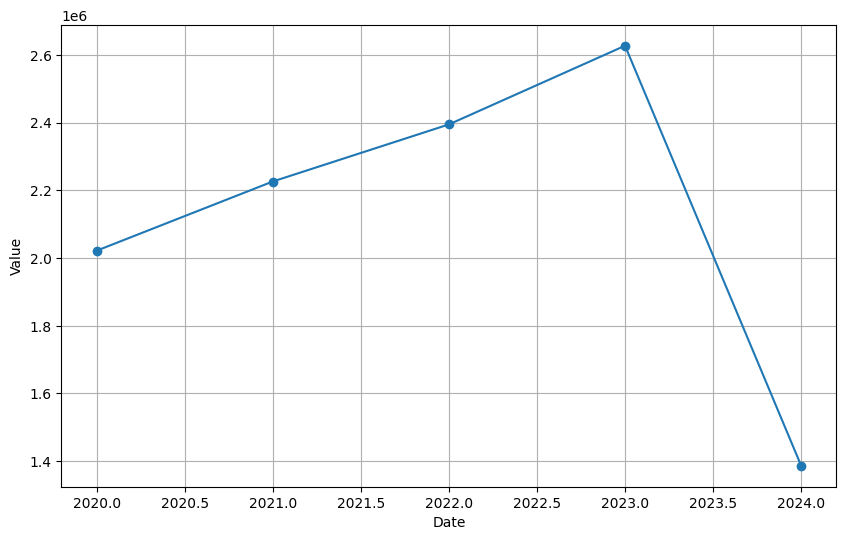

In [141]:
Power_demand['year']=Power_demand.ds.dt.year
pp=Power_demand.groupby('year')['y'].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(pp.index, pp, label='Actual', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()
plt.show()


In [142]:
#train

In [143]:

# model = Prophet()
# model.add_regressor('Holiday_Count')
# model.fit(train)

# future = test[['ds', 'Holiday_Count']].copy()
# forecast = model.predict(future)
# forecast

In [144]:

# # Merge forecast with test data
# test = pd.merge(forecast[['ds', 'yhat']], test[['ds', 'y']], on='ds', how='inner')
# test

In [145]:


# check = pd.merge(test,India_Power_demand_peak, on='ds', how='inner')
# check

In [146]:

# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Calculate metrics
# Prophet_mae = mean_absolute_error(test['y'], test['yhat'])
# Prophet_rmse = np.sqrt(mean_squared_error(test['y'], test['yhat']))

# print(f"Mean Absolute Error (MAE): {Prophet_mae}")
# print(f"Root Mean Squared Error (RMSE): {Prophet_rmse}")


# Prophet_mape = np.mean(np.abs((test['y'] - test['yhat']) / test['y'])) * 100
# print(f"Mean Absolute Percentage Error (MAPE): {Prophet_mape}%")


In [147]:
# import matplotlib.pyplot as plt

# # Plot
# plt.figure(figsize=(10, 6))
# plt.plot(test['ds'], test['y'], label='Actual', marker='o')
# plt.plot(test['ds'], test['yhat'], label='Forecast', marker='x')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.title('Actual vs Forecast')
# plt.legend()
# plt.grid()
# plt.show()


In [148]:
num=Power_demand.select_dtypes(include=np.number).columns
Power_demand_1=pd.DataFrame(index=Power_demand.index)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in num:
  Power_demand_1[i] = scaler.fit_transform(Power_demand[[i]])

Power_demand_1.head()



,y,Holiday_Count,Temperature,year
0,-1.083162,-0.391965,-1.581729,-1.352247
1,-0.767013,-0.391965,-1.186709,-1.352247
2,-1.118693,-0.391965,-0.344693,-1.352247
3,-2.700190,2.050277,0.512916,-1.352247
4,-1.281226,0.422116,1.056068,-1.352247


<Axes: >

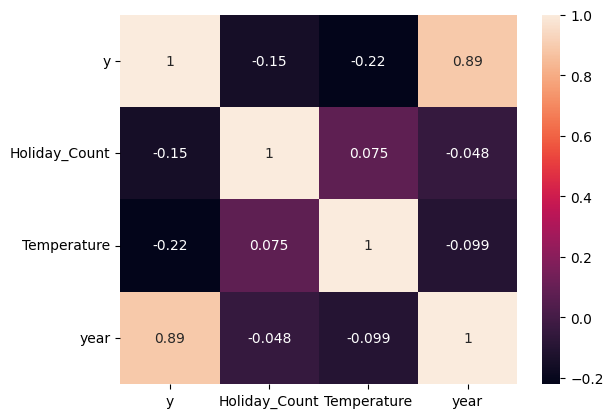

In [149]:
Correl=Power_demand_1.select_dtypes(include=np.number).corr()
sns.heatmap(Correl,annot=True)

In [150]:
Power_demand.head()

,ds,y,Holiday_Count,Temperature,year
0,2020-01-01,171592.173352,1,14.30,2020
1,2020-02-01,179098.259477,1,15.82,2020
2,2020-03-01,170748.586297,1,19.06,2020
3,2020-04-01,133200.290550,4,22.36,2020
4,2020-05-01,166889.674773,2,24.45,2020


Train size : 37 
Test size : 17


14:25:02 - cmdstanpy - INFO - Chain [1] start processing
14:25:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 12612.51996465834
Root Mean Squared Error (RMSE): 14590.427209450721
Mean Absolute Percentage Error (MAPE): 5.567161209412901%


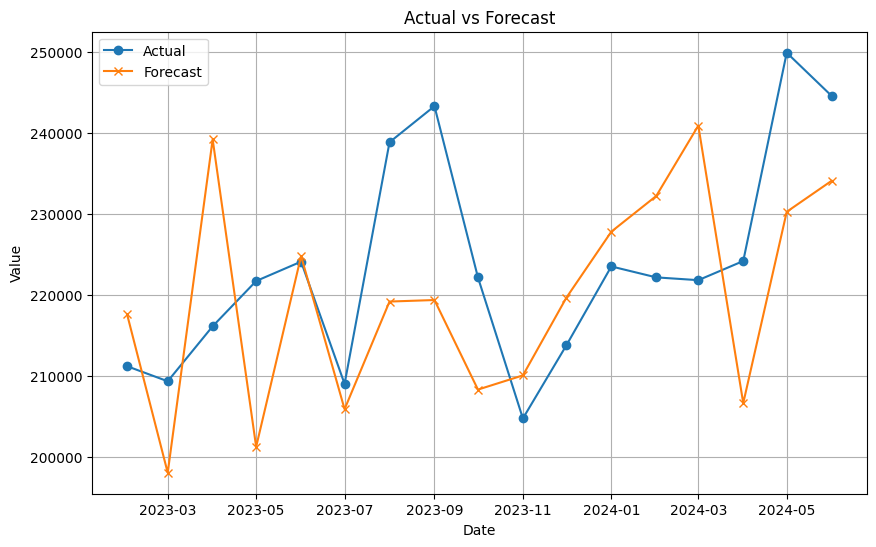

In [151]:
# Univariate Prophet

train_size = int(len(Power_demand) * 0.7)
train = Power_demand[:train_size].drop(['Holiday_Count','Temperature'],axis=1)
test = Power_demand[train_size:].drop(['Holiday_Count','Temperature'],axis=1)                
print("Train size :",len(train),"\nTest size :",len(test))

model = Prophet()
model.fit(train)

future = test[['ds']].copy()
forecast = model.predict(future)
forecast

# Merge forecast with test data
test = pd.merge(forecast[['ds', 'yhat']], test[['ds', 'y']], on='ds', how='inner')
test

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics
Prophet_mae = mean_absolute_error(test['y'], test['yhat'])
Prophet_rmse = np.sqrt(mean_squared_error(test['y'], test['yhat']))

print(f"Mean Absolute Error (MAE): {Prophet_mae}")
print(f"Root Mean Squared Error (RMSE): {Prophet_rmse}")


Prophet_mape = np.mean(np.abs((test['y'] - test['yhat']) / test['y'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {Prophet_mape}%")



# Plot
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Actual', marker='o')
plt.plot(test['ds'], test['yhat'], label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()


In [152]:
test

,ds,yhat,y
0,2023-02-01,217594.630075,211214.626125
1,2023-03-01,198089.507047,209361.445312
2,2023-04-01,239178.977492,216141.509033
3,2023-05-01,201280.130622,221717.791572
4,2023-06-01,224798.195606,224106.069566
5,2023-07-01,205921.100626,209038.752304
6,2023-08-01,219186.634347,238823.823170
7,2023-09-01,219375.008766,243271.469257
8,2023-10-01,208336.060686,222159.508512
9,2023-11-01,210086.507535,204777.322586


Train size : 37 
Test size : 17


14:25:03 - cmdstanpy - INFO - Chain [1] start processing
14:25:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 13250.776024785751
Root Mean Squared Error (RMSE): 15861.808733516555
Mean Absolute Percentage Error (MAPE): 5.886622328427063%


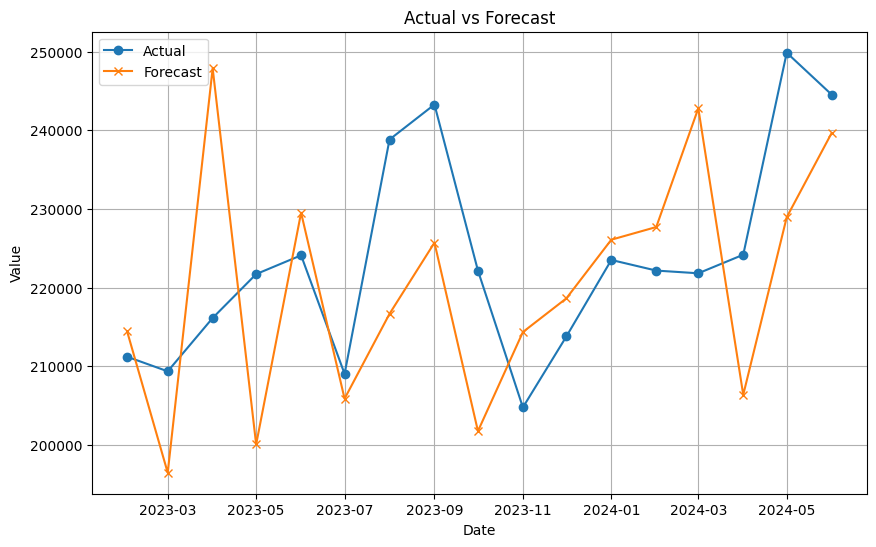

In [153]:
train_size = int(len(Power_demand) * 0.7)
train = Power_demand[:train_size]
test = Power_demand[train_size:]                   
print("Train size :",len(train),"\nTest size :",len(test))


model = Prophet()
model.add_regressor('Holiday_Count')
model.add_regressor('Temperature')
model.fit(train)

future = test[['ds', 'Holiday_Count','Temperature']].copy()
forecast = model.predict(future)
forecast

# Merge forecast with test data
test = pd.merge(forecast[['ds', 'yhat']], test[['ds', 'y']], on='ds', how='inner')
test

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics
Prophet_mae = mean_absolute_error(test['y'], test['yhat'])
Prophet_rmse = np.sqrt(mean_squared_error(test['y'], test['yhat']))

print(f"Mean Absolute Error (MAE): {Prophet_mae}")
print(f"Root Mean Squared Error (RMSE): {Prophet_rmse}")


Prophet_mape = np.mean(np.abs((test['y'] - test['yhat']) / test['y'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {Prophet_mape}%")



# Plot
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Actual', marker='o')
plt.plot(test['ds'], test['yhat'], label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid()
plt.show()


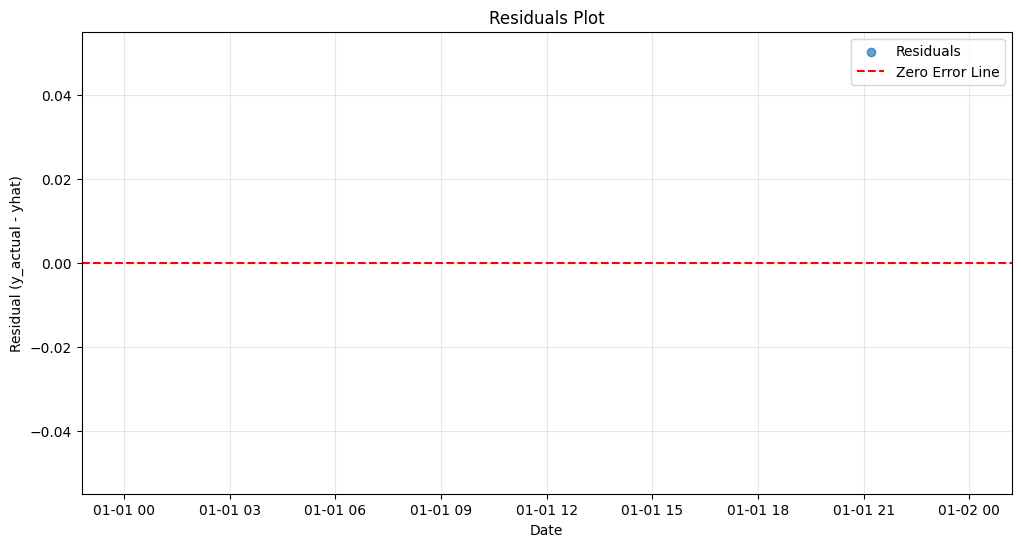

In [154]:
# naive

test = Power_demand[train_size:] 

forecast['y_actual'] = test['y']


# Calculating residuals
forecast['residual'] = forecast['y_actual'] - forecast['yhat']

# Plotting residuals
plt.figure(figsize=(12, 6))
plt.scatter(forecast['ds'], forecast['residual'], alpha=0.7, label="Residuals")
plt.axhline(0, color='red', linestyle='--', linewidth=1.5, label="Zero Error Line")
plt.title("Residuals Plot")
plt.xlabel("Date")
plt.ylabel("Residual (y_actual - yhat)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [155]:
# Naïve Forecast: use the last observed value


naive_forecast = test['y'].shift(1)  # Shift values to create forecast
naive_forecast = naive_forecast.fillna(method='bfill')  # Handle first NaN

# Evaluate performance
naive_mae = mean_absolute_error(test['y'], naive_forecast)
naive_rmse = mean_squared_error(test['y'], naive_forecast, squared=False)
naive_mape = (abs(test['y'] - naive_forecast) / test['y']).mean() * 100

print(f"Naïve Forecast - MAE: {naive_mae}, RMSE: {naive_rmse}, MAPE: {naive_mape}%")


Naïve Forecast - MAE: 9304.950758826875, RMSE: 12922.688234590323, MAPE: 4.113977520250288%


Train size : 37 
Test size : 17
RandomForestt - MAE: 16337.011353826225, RMSE: 20565.459985322555, MAPE: 7.02053178214153%
R² Score: -1.54
Training Performance - MAE: 3262.6559287707455, RMSE: 4382.123401565816, MAPE: 1.8473927282683114%


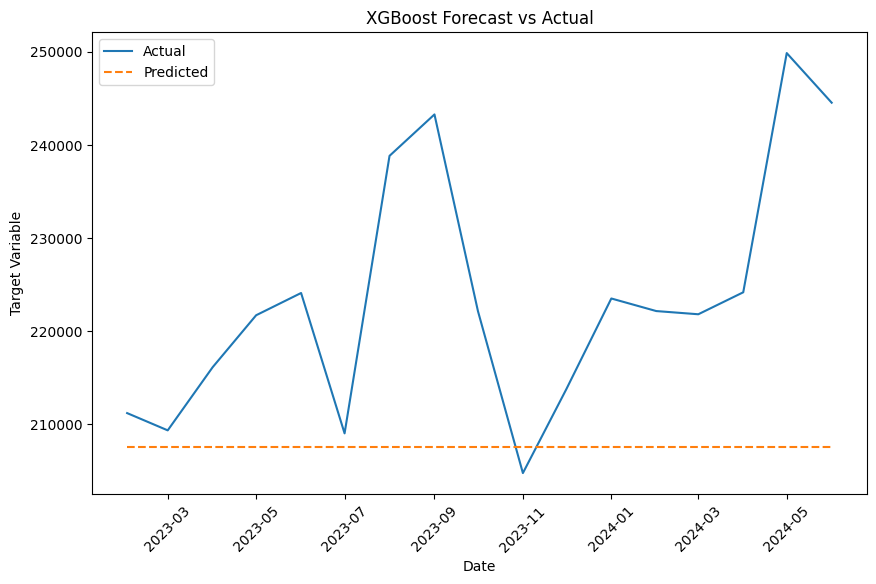

In [156]:
from sklearn.ensemble import RandomForestRegressor


Power_demand=copy.deepcopy(Data)
Power_demand.head()

#print(Power_demand.drop('ds', axis=1))

train_size = int(len(Power_demand) * 0.7)
train = Power_demand[:train_size].drop(['Holiday_Count','Temperature','Peak Met'],axis=1)
test = Power_demand[train_size:].drop(['Holiday_Count','Temperature','Peak Met'],axis=1)        
print("Train size :",len(train),"\nTest size :",len(test))



# Prepare features
train['ds_num'] = train['ds'].map(pd.Timestamp.toordinal)  # Convert dates to ordinal
X_train, y_train = train.drop(['ds','y'],axis=1), train['y']
test['ds_num'] = test['ds'].map(pd.Timestamp.toordinal)  
X_test ,y_test=test.drop(['ds','y'],axis=1), test['y']




# Fit the RandomForest model
rf_1 = RandomForestRegressor()
rf_1.fit(X_train, y_train)


# Predict
y_pred = rf_1.predict(X_test)



# Evaluate performance
RF_mae = mean_absolute_error(y_test, y_pred)
RF_rmse = mean_squared_error(y_test, y_pred, squared=False)
RF_mape = (abs((y_test - y_pred)) /y_test).mean() * 100

print(f"RandomForestt - MAE: {RF_mae}, RMSE: {RF_rmse}, MAPE: {RF_mape}%")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_1, X_train, y_train, cv=5, scoring='r2')
#print(f"Cross-validation R² scores: {cv_scores}")
#print(f"Mean R² score: {cv_scores.mean()}")



# Evaluate performance on training data
y_train_pred = rf_1.predict(X_train)



train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Performance - MAE: {train_mae}, RMSE: {train_rmse}, MAPE: {train_mape}%")


# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title("XGBoost Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Target Variable")
plt.xticks(rotation=45)
plt.show()

In [157]:
Power_demand.head()

,ds,Peak Met,y,Holiday_Count,Temperature
0,2020-01-01,170976.085205,171592.173352,1,14.30
1,2020-02-01,176387.563477,179098.259477,1,15.82
2,2020-03-01,170164.931030,170748.586297,1,19.06
3,2020-04-01,132733.183350,133200.290550,4,22.36
4,2020-05-01,166225.394775,166889.674773,2,24.45


Train size : 37 
Test size : 17
XGBoost - MAE: 15088.59609116692, RMSE: 19484.15498049743, MAPE: 6.466879863042141%


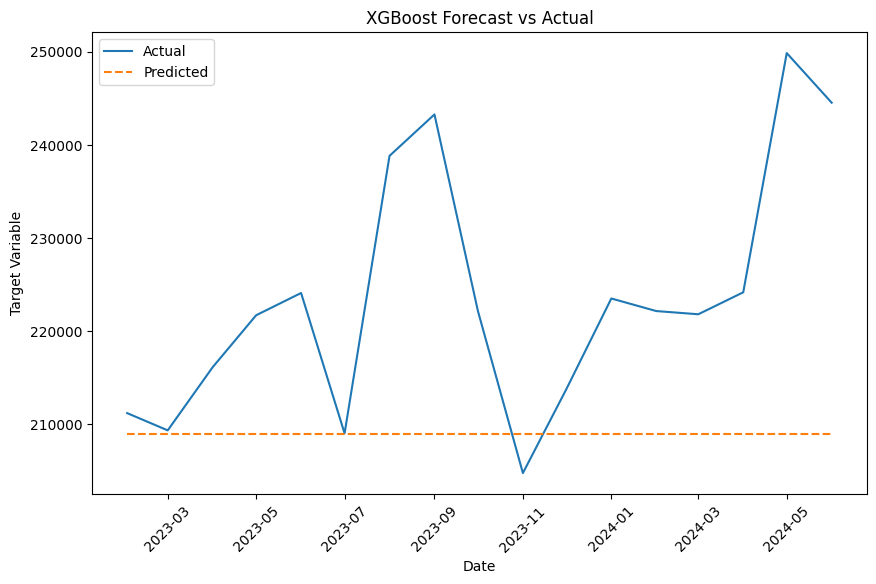

In [158]:
# Univariate

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


Power_demand=copy.deepcopy(Data)
Power_demand.head()

#print(Power_demand.drop('ds', axis=1))

train_size = int(len(Power_demand) * 0.7)
train = Power_demand[:train_size].drop(['Holiday_Count','Temperature','Peak Met'],axis=1)
test = Power_demand[train_size:].drop(['Holiday_Count','Temperature','Peak Met'],axis=1)        
print("Train size :",len(train),"\nTest size :",len(test))



# Prepare features
train['ds_num'] = train['ds'].map(pd.Timestamp.toordinal)  # Convert dates to ordinal
X_train, y_train = train.drop(['ds','y'],axis=1), train['y']
test['ds_num'] = test['ds'].map(pd.Timestamp.toordinal)  
X_test ,y_test=test.drop(['ds','y'],axis=1), test['y']

# Train XGBoost model
xgb_model= XGBRegressor(n_estimators=200,
    learning_rate=0.05,
    max_depth=2,
    random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
xgb_forecast = xgb_model.predict(X_test)

# Evaluate performance
xgb_mae = mean_absolute_error(test['y'], xgb_forecast)
xgb_rmse = mean_squared_error(test['y'], xgb_forecast, squared=False)
xgb_mape = (abs(test['y'] - xgb_forecast) / test['y']).mean() * 100

print(f"XGBoost - MAE: {xgb_mae}, RMSE: {xgb_rmse}, MAPE: {xgb_mape}%")

import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], xgb_forecast, label='Predicted', linestyle='--')
plt.legend()
plt.title("XGBoost Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Target Variable")
plt.xticks(rotation=45)
plt.show()

Train size : 37 
Test size : 17
XGBoost - MAE: 12886.505614201335, RMSE: 17004.581556792287, MAPE: 5.516261095855405%
Training Performance - MAE: 184.31296137931074, RMSE: 254.89086247662328, MAPE: 0.10279590379258913%


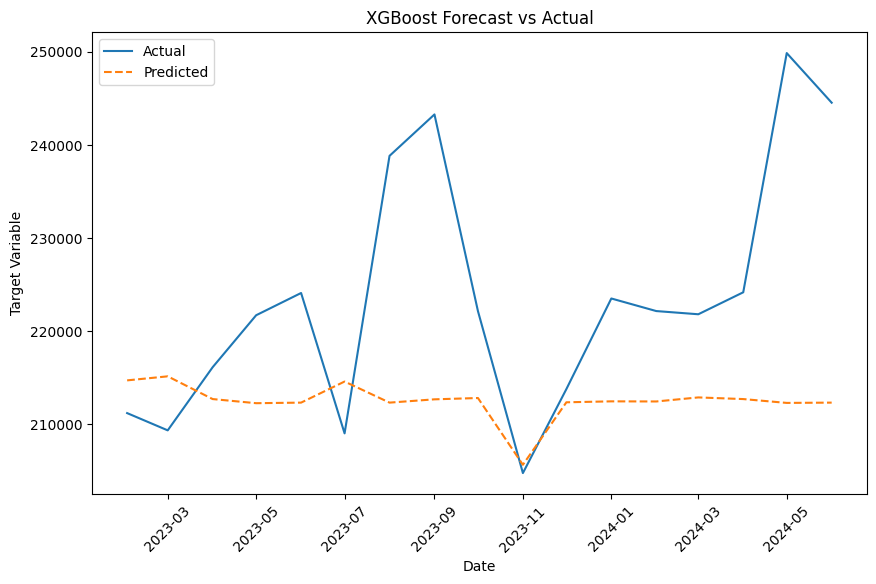

In [159]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

Power_demand=copy.deepcopy(Data)
Power_demand.head()


train_size = int(len(Power_demand) * 0.7)
train = Power_demand[:train_size]
test = Power_demand[train_size:]                   
print("Train size :",len(train),"\nTest size :",len(test))



# Prepare features
train['ds_num'] = train['ds'].map(pd.Timestamp.toordinal)  # Convert dates to ordinal
X_train, y_train = train.drop(['ds','y'],axis=1), train['y']
test['ds_num'] = test['ds'].map(pd.Timestamp.toordinal)  
X_test ,y_test=test.drop(['ds','y'],axis=1), test['y']

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample= 0.8,
    random_state=42,alpha=0.01,lambda_=1)

xgb_model.fit(X_train, y_train)

# Predict
xgb_forecast = xgb_model.predict(X_test)

# Evaluate performance
xgb_mae = mean_absolute_error(test['y'], xgb_forecast)
xgb_rmse = mean_squared_error(test['y'], xgb_forecast, squared=False)
xgb_mape = (abs(test['y'] - xgb_forecast) / test['y']).mean() * 100

print(f"XGBoost - MAE: {xgb_mae}, RMSE: {xgb_rmse}, MAPE: {xgb_mape}%")


# Evaluate performance on training data
y_train_pred = xgb_model.predict(X_train)

#print( y_train_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Performance - MAE: {train_mae}, RMSE: {train_rmse}, MAPE: {train_mape}%")

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], xgb_forecast, label='Predicted', linestyle='--')
plt.legend()
plt.title("XGBoost Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Target Variable")
plt.xticks(rotation=45)
plt.show()

In [160]:
""" from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 500],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'alpha':[0.01,0.05] ,
    'lambda_':[1,2]
}
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
 """

' from sklearn.model_selection import GridSearchCV\nparam_grid = {\n    \'learning_rate\': [0.01, 0.05, 0.1],\n    \'max_depth\': [3, 6, 9],\n    \'n_estimators\': [100, 200, 500],\n    \'subsample\': [0.7, 0.8, 1.0],\n    \'colsample_bytree\': [0.7, 0.8, 1.0],\n    \'alpha\':[0.01,0.05] ,\n    \'lambda_\':[1,2]\n}\ngrid_search = GridSearchCV(xgb_model, param_grid, scoring=\'neg_mean_absolute_error\', cv=5)\ngrid_search.fit(X_train, y_train)\nprint("Best Parameters:", grid_search.best_params_)\n '

Train size : 37 
Test size : 17
XGBoost - MAE: 11943.387967142511, RMSE: 16477.881704587468, MAPE: 5.088967540642281%
Training Performance - MAE: 141.41069291225034, RMSE: 205.07417888840953, MAPE: 0.0778006374339764%


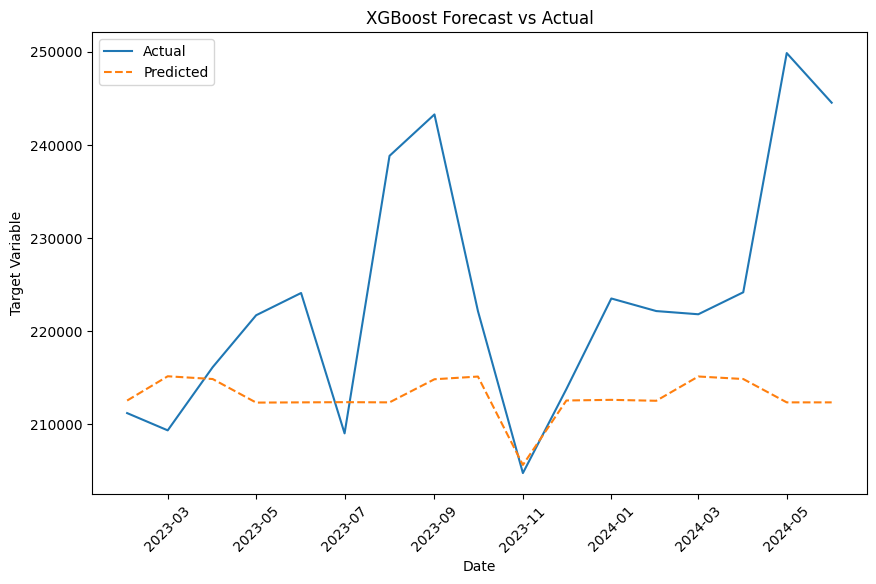

In [161]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

Power_demand=copy.deepcopy(Data)
Power_demand.head()


train_size = int(len(Power_demand) * 0.7)
train = Power_demand[:train_size]
test = Power_demand[train_size:]                   
print("Train size :",len(train),"\nTest size :",len(test))



# Prepare features
train['ds_num'] = train['ds'].map(pd.Timestamp.toordinal)  # Convert dates to ordinal
X_train, y_train = train.drop(['ds','y'],axis=1), train['y']
test['ds_num'] = test['ds'].map(pd.Timestamp.toordinal)  
X_test ,y_test=test.drop(['ds','y'],axis=1), test['y']

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42)

xgb_model.fit(X_train, y_train)

# Predict
xgb_forecast = xgb_model.predict(X_test)

# Evaluate performance
xgb_mae = mean_absolute_error(test['y'], xgb_forecast)
xgb_rmse = mean_squared_error(test['y'], xgb_forecast, squared=False)
xgb_mape = (abs(test['y'] - xgb_forecast) / test['y']).mean() * 100

print(f"XGBoost - MAE: {xgb_mae}, RMSE: {xgb_rmse}, MAPE: {xgb_mape}%")

# Evaluate performance on training data
y_train_pred = xgb_model.predict(X_train)

#print( y_train_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Performance - MAE: {train_mae}, RMSE: {train_rmse}, MAPE: {train_mape}%")


# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], xgb_forecast, label='Predicted', linestyle='--')
plt.legend()
plt.title("XGBoost Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Target Variable")
plt.xticks(rotation=45)
plt.show()

In [162]:
xgb_forecast,test['y']

(array([212560.61, 215166.36, 214873.25, 212341.64, 212366.23, 212388.97,
        212366.23, 214847.78, 215136.55, 205651.98, 212567.33, 212637.48,
        212537.86, 215143.61, 214873.25, 212366.23, 212366.23],
       dtype=float32),
 37    211214.626125
 38    209361.445312
 39    216141.509033
 40    221717.791572
 41    224106.069566
 42    209038.752304
 43    238823.823170
 44    243271.469257
 45    222159.508512
 46    204777.322586
 47    213793.179118
 48    223516.088037
 49    222166.336914
 50    221823.000000
 51    224181.077693
 52    249856.325994
 53    244529.328527
 Name: y, dtype: float64)

In [163]:
Power_demand.head()

,ds,Peak Met,y,Holiday_Count,Temperature
0,2020-01-01,170976.085205,171592.173352,1,14.30
1,2020-02-01,176387.563477,179098.259477,1,15.82
2,2020-03-01,170164.931030,170748.586297,1,19.06
3,2020-04-01,132733.183350,133200.290550,4,22.36
4,2020-05-01,166225.394775,166889.674773,2,24.45


Train size : 37 
Test size : 17
XGBoost - MAE: 12399.862231848394, RMSE: 16753.3211164571, MAPE: 5.291225729576851%
Training Performance - MAE: 123.98611135972189, RMSE: 174.23505715508193, MAPE: 0.06721737832081377%


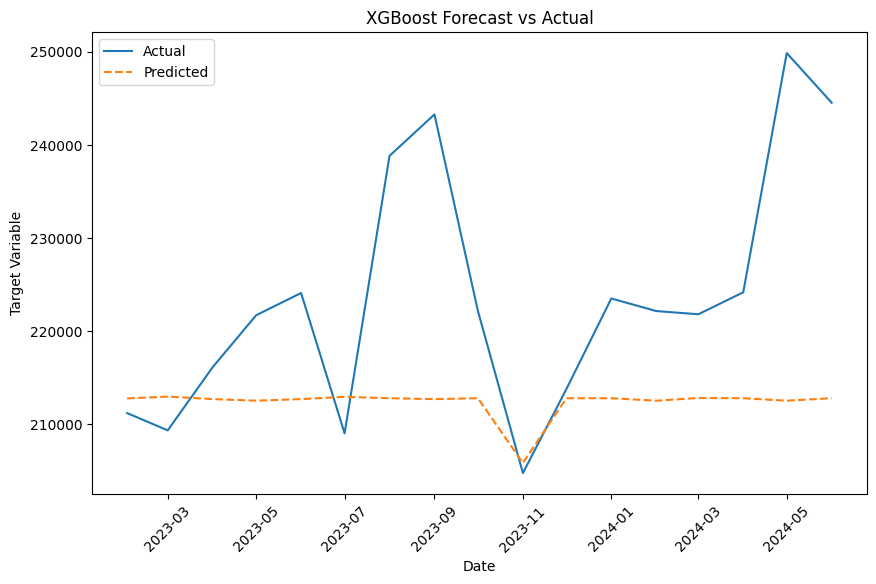

In [164]:

Power_demand=copy.deepcopy(Data)
Power_demand.head()

#print(Power_demand.drop('ds', axis=1).skew())

# Log transformation to handle skewness
Power_demand['Holiday_Count'] = np.log1p(Power_demand['Holiday_Count']+1).diff(1)
Power_demand['Temperature'] = Power_demand['Temperature'].diff(12)

# Check for skewness
#print(Power_demand.drop('ds', axis=1).skew())


train_size = int(len(Power_demand) * 0.7)
train = Power_demand[:train_size]
test = Power_demand[train_size:]                   
print("Train size :",len(train),"\nTest size :",len(test))



# Prepare features
train['ds_num'] = train['ds'].map(pd.Timestamp.toordinal)  # Convert dates to ordinal
X_train, y_train = train.drop(['ds','y'],axis=1), train['y']
test['ds_num'] = test['ds'].map(pd.Timestamp.toordinal)  
X_test ,y_test=test.drop(['ds','y'],axis=1), test['y']

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42)

xgb_model.fit(X_train, y_train)

# Predict
xgb_forecast = xgb_model.predict(X_test)

# Evaluate performance
xgb_mae = mean_absolute_error(test['y'], xgb_forecast)
xgb_rmse = mean_squared_error(test['y'], xgb_forecast, squared=False)
xgb_mape = (abs(test['y'] - xgb_forecast) / test['y']).mean() * 100

print(f"XGBoost - MAE: {xgb_mae}, RMSE: {xgb_rmse}, MAPE: {xgb_mape}%")

# Evaluate performance on training data
y_train_pred = xgb_model.predict(X_train)

#print( y_train_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Performance - MAE: {train_mae}, RMSE: {train_rmse}, MAPE: {train_mape}%")


# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], xgb_forecast, label='Predicted', linestyle='--')
plt.legend()
plt.title("XGBoost Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Target Variable")
plt.xticks(rotation=45)
plt.show()

In [165]:

Power_demand=copy.deepcopy(Data)
Power_demand.head()

Power_demand['y_lag_1'] = Power_demand['y'].shift(1)  # 1-day lag
Power_demand['y_lag_2'] = Power_demand['y'].shift(2)  # 2-day lag
Power_demand['y_lag_7'] = Power_demand['y'].shift(7)  # 1-week lag
Power_demand['y_lag_30'] = Power_demand['y'].shift(30)  # 1-month lag

Power_demand

,ds,Peak Met,y,Holiday_Count,Temperature,y_lag_1,y_lag_2,y_lag_7,y_lag_30
0,2020-01-01,170976.085205,171592.173352,1,14.300000,NaN,NaN,NaN,NaN
1,2020-02-01,176387.563477,179098.259477,1,15.820000,171592.173352,NaN,NaN,NaN
2,2020-03-01,170164.931030,170748.586297,1,19.060000,179098.259477,171592.173352,NaN,NaN
3,2020-04-01,132733.183350,133200.290550,4,22.360000,170748.586297,179098.259477,NaN,NaN
4,2020-05-01,166225.394775,166889.674773,2,24.450000,133200.290550,170748.586297,NaN,NaN
5,2020-06-01,164981.616943,166686.364904,0,24.810000,166889.674773,133200.290550,NaN,NaN
6,2020-07-01,170408.308594,171509.509783,0,24.770000,166686.364904,166889.674773,NaN,NaN
7,2020-08-01,167528.000000,169126.986084,4,24.730000,171509.509783,166686.364904,171592.173352,NaN
8,2020-09-01,176413.473389,177018.753389,0,24.080000,169126.986084,171509.509783,179098.259477,NaN
9,2020-10-01,169898.817627,170555.696313,3,21.890000,177018.753389,169126.986084,170748.586297,NaN


Train size : 16 
Test size : 8
XGBoost - MAE: 2094.8012165908876, RMSE: 3056.76226027851, MAPE: 0.9112597959426209%, R²: 0.95
Training Performance - MAE: 85.62234784262364, RMSE: 143.76585300449167, MAPE: 0.03945486757192478%


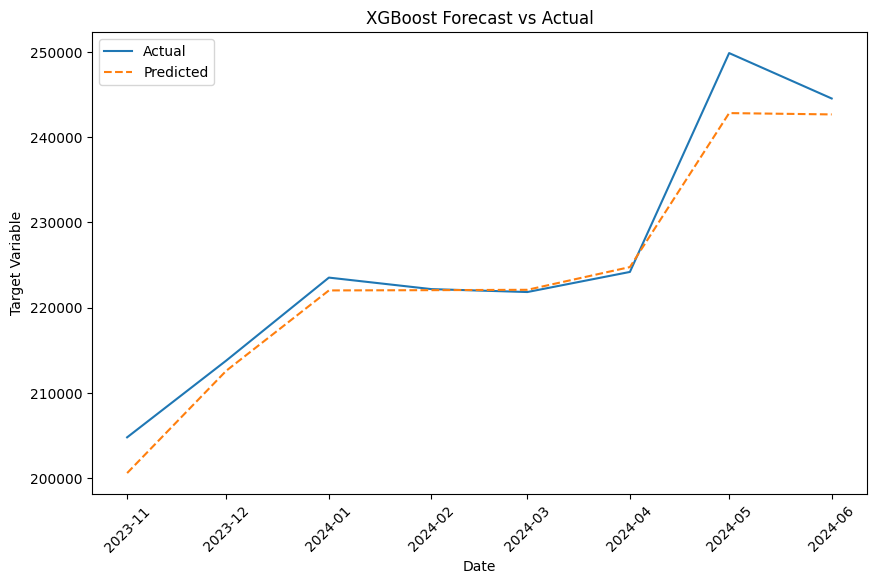

In [166]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

Power_demand=copy.deepcopy(Data)
Power_demand.head()

Power_demand['y_lag_1'] = Power_demand['y'].shift(1)  # 1-day lag
Power_demand['y_lag_2'] = Power_demand['y'].shift(2)  # 2-day lag
Power_demand['y_lag_7'] = Power_demand['y'].shift(7)  # 1-week lag
Power_demand['y_lag_30'] = Power_demand['y'].shift(30)  # 1-month lag

Power_demand.head()

# Drop missing values created by lag shifts
Power_demand = Power_demand.dropna()


train_size = int(len(Power_demand) * 0.7)
train = Power_demand[:train_size]
test = Power_demand[train_size:]                   
print("Train size :",len(train),"\nTest size :",len(test))



# Prepare features
train['ds_num'] = train['ds'].map(pd.Timestamp.toordinal)  # Convert dates to ordinal
X_train, y_train = train.drop(['ds','y'],axis=1), train['y']
test['ds_num'] = test['ds'].map(pd.Timestamp.toordinal)  
X_test ,y_test=test.drop(['ds','y'],axis=1), test['y']

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample= 0.8,
    random_state=42,alpha=0.01,lambda_=1)

xgb_model.fit(X_train, y_train)

# Predict
xgb_forecast = xgb_model.predict(X_test)

# Evaluate performance
xgb_mae = mean_absolute_error(test['y'], xgb_forecast)
xgb_rmse = mean_squared_error(test['y'], xgb_forecast, squared=False)
xgb_mape = (abs(test['y'] - xgb_forecast) / test['y']).mean() * 100
r2_peak = r2_score(test['y'], xgb_forecast)


print(f"XGBoost - MAE: {xgb_mae}, RMSE: {xgb_rmse}, MAPE: {xgb_mape}%, R²: {r2_peak:.2f}")


# Evaluate performance on training data
y_train_pred = xgb_model.predict(X_train)

#print( y_train_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Performance - MAE: {train_mae}, RMSE: {train_rmse}, MAPE: {train_mape}%")

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], xgb_forecast, label='Predicted', linestyle='--')
plt.legend()
plt.title("XGBoost Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Target Variable")
plt.xticks(rotation=45)
plt.show()

Train size : 16 
Test size : 8
XGBoost - MAE: 2094.7758259658876, RMSE: 3065.691822940737, MAPE: 0.9113149289414684%
R² Score: 0.95
Training Performance - MAE: 85.95129681723665, RMSE: 141.39096374823316, MAPE: 0.03959751108671367%


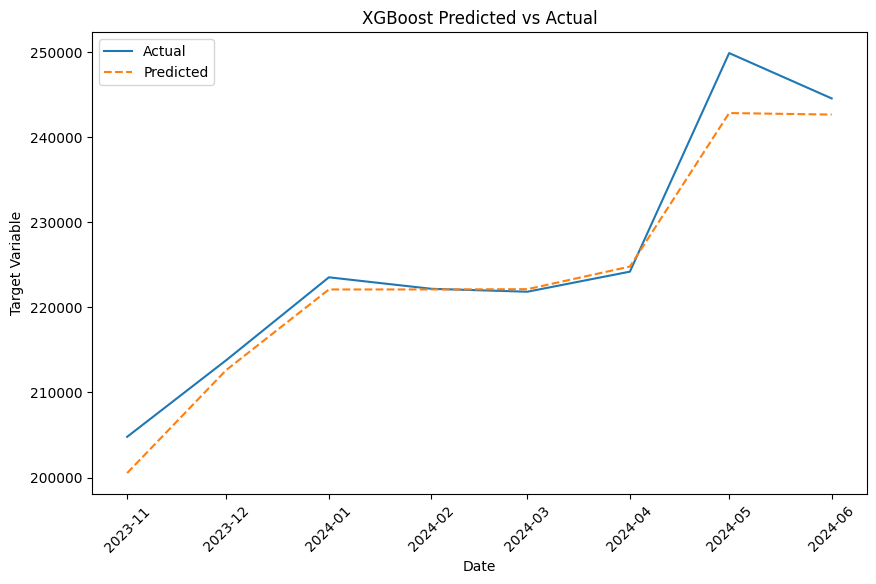

In [167]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

Power_demand=copy.deepcopy(Data)
Power_demand.head()

Power_demand['y_lag_30'] = Power_demand['y'].shift(30)  # 1-month lag

Power_demand.head()

# Drop missing values created by lag shifts
Power_demand = Power_demand.dropna()


train_size = int(len(Power_demand) * 0.7)
train = Power_demand[:train_size]
test = Power_demand[train_size:]                   
print("Train size :",len(train),"\nTest size :",len(test))

# columns = ['ds', 'Peak Met', 'y', 'Holiday_Count', 'Temperature', 'y_lag_30']

# Prepare features
train['ds_num'] = train['ds'].map(pd.Timestamp.toordinal)  # Convert dates to ordinal
X_train, y_train = train.drop(['ds','y'],axis=1), train['y']
test['ds_num'] = test['ds'].map(pd.Timestamp.toordinal)  
X_test ,y_test=test.drop(['ds','y'],axis=1), test['y']

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample= 0.8,
    random_state=42,alpha=0.01,lambda_=1)

xgb_model.fit(X_train, y_train)

# Predict
xgb_forecast = xgb_model.predict(X_test)

# Evaluate performance
xgb_mae = mean_absolute_error(test['y'], xgb_forecast)
xgb_rmse = mean_squared_error(test['y'], xgb_forecast, squared=False)
xgb_mape = (abs(test['y'] - xgb_forecast) / test['y']).mean() * 100

print(f"XGBoost - MAE: {xgb_mae}, RMSE: {xgb_rmse}, MAPE: {xgb_mape}%")

r2 = r2_score(y_test, xgb_forecast)
print(f"R² Score: {r2:.2f}")

# Evaluate performance on training data
y_train_pred = xgb_model.predict(X_train)

#print( y_train_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mape = (abs((y_train - y_train_pred)) / y_train).mean() * 100

print(f"Training Performance - MAE: {train_mae}, RMSE: {train_rmse}, MAPE: {train_mape}%")

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], xgb_forecast, label='Predicted', linestyle='--')
plt.legend()
plt.title("XGBoost Predicted vs Actual")
plt.xlabel("Date")
plt.ylabel("Target Variable")
plt.xticks(rotation=45)
plt.show()

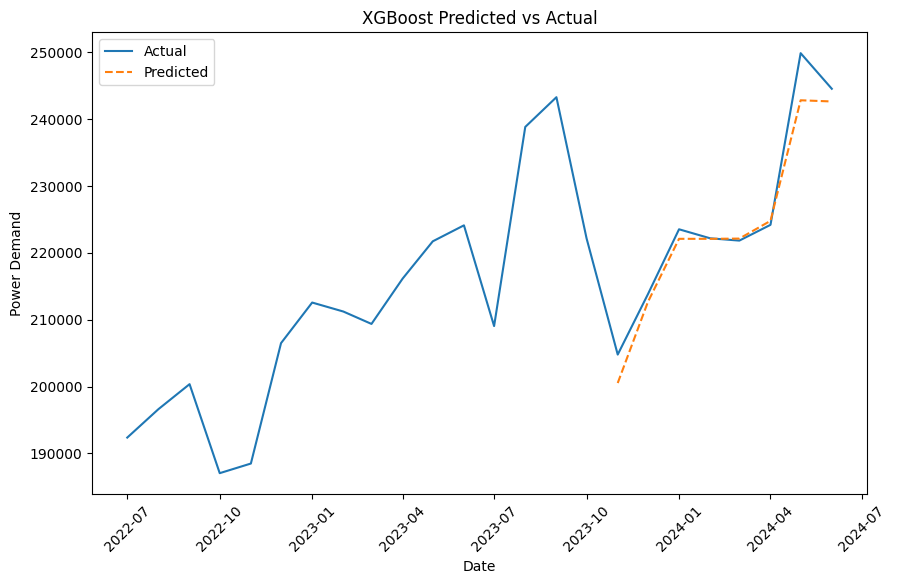

In [168]:
# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(Power_demand['ds'], Power_demand['y'], label='Actual')
plt.plot(test['ds'], xgb_forecast, label='Predicted', linestyle='--')
plt.legend()
plt.title("XGBoost Predicted vs Actual")
plt.xlabel("Date")
plt.ylabel("Power Demand")
plt.xticks(rotation=45)
plt.show()

In [169]:
#forecast_temp[30:]

In [170]:
Power_demand=copy.deepcopy(Data)
Power_demand.head()

,ds,Peak Met,y,Holiday_Count,Temperature
0,2020-01-01,170976.085205,171592.173352,1,14.30
1,2020-02-01,176387.563477,179098.259477,1,15.82
2,2020-03-01,170164.931030,170748.586297,1,19.06
3,2020-04-01,132733.183350,133200.290550,4,22.36
4,2020-05-01,166225.394775,166889.674773,2,24.45


In [171]:
# Prepare future data (for example, future dates)
future_dates = pd.date_range(start="2024-07-01", periods=30, freq='MS')  # 30 days forecast


# Assuming you have a similar feature engineering process for future data
future_data = pd.DataFrame({'ds': future_dates})
future_data['Peak Met'] =Power_demand['Peak Met'].iloc[-1]
future_data['y'] = np.nan

#future_data['ds_num'] = future_data['ds'].map(pd.Timestamp.toordinal)

future_data= pd.merge(future_data,forecast_temp[30:],how='inner',left_on='ds',right_on='Date')
future_data.drop('Date',axis=1,inplace=True)

future_data['Holiday_Count']=Power_demand['Holiday_Count'].iloc[-30:].tolist()


#future_data= future_data.drop(['ds'],axis=1)
future_data=future_data[:25]
future_data.head()



,ds,Peak Met,y,Temperature,Holiday_Count
0,2024-07-01,244520.299561,NaN,12.867841,1
1,2024-08-01,244520.299561,NaN,14.265411,0
2,2024-09-01,244520.299561,NaN,17.575647,2
3,2024-10-01,244520.299561,NaN,20.851582,2
4,2024-11-01,244520.299561,NaN,23.017309,2


In [172]:
X_test.columns

Index(['Peak Met', 'Holiday_Count', 'Temperature', 'y_lag_30', 'ds_num'], dtype='object')

In [173]:
future=pd.concat([Power_demand,future_data],ignore_index=True)
future['ds_num'] = future['ds'].map(pd.Timestamp.toordinal)
future= future.drop(['ds'],axis=1)
future



,Peak Met,y,Holiday_Count,Temperature,ds_num
0,170976.085205,171592.173352,1,14.300000,737425
1,176387.563477,179098.259477,1,15.820000,737456
2,170164.931030,170748.586297,1,19.060000,737485
3,132733.183350,133200.290550,4,22.360000,737516
4,166225.394775,166889.674773,2,24.450000,737546
...,...,...,...,...,...
74,244520.299561,NaN,2,21.505094,739676
75,244520.299561,NaN,2,18.916418,739707
76,244520.299561,NaN,1,16.546408,739737
77,244520.299561,NaN,1,12.566384,739768


In [174]:
future['y_lag_30'] = future['y'].shift(30) 
future=future[future['y_lag_30'].notna()].reset_index(drop=True)
future 	# want after 2024-06-01	



,Peak Met,y,Holiday_Count,Temperature,ds_num,y_lag_30
0,190355.311280,192363.007812,1,13.830488,738337,171592.173352
1,195226.070557,196611.483389,3,15.263403,738368,179098.259477
2,199501.032715,200351.407879,0,18.530712,738399,170748.586297
3,186900.000000,187041.151963,4,21.856289,738429,133200.290550
4,187346.133789,188481.096189,0,23.994921,738460,166889.674773
5,205101.433594,206488.627639,1,24.289186,738490,166686.364904
6,210724.949463,212559.275029,1,24.096389,738521,171509.509783
7,209766.629150,211214.626125,0,23.231150,738552,169126.986084
8,208927.830566,209361.445312,2,22.985001,738580,177018.753389
9,215971.509033,216141.509033,4,20.421359,738611,170555.696313


In [175]:
ff=future[24:]
ff

,Peak Met,y,Holiday_Count,Temperature,ds_num,y_lag_30
24,244520.299561,NaN,1,12.867841,739068,193089.871852
25,244520.299561,NaN,0,14.265411,739099,193859.345738
26,244520.299561,NaN,2,17.575647,739130,201954.687248
27,244520.299561,NaN,2,20.851582,739160,215888.203222
28,244520.299561,NaN,2,23.017309,739191,205995.640181
29,244520.299561,NaN,0,23.292989,739221,212341.228941
30,244520.299561,NaN,1,23.120874,739252,192363.007812
31,244520.299561,NaN,3,22.234706,739283,196611.483389
32,244520.299561,NaN,0,21.999336,739311,200351.407879
33,244520.299561,NaN,4,19.413640,739342,187041.151963


In [176]:
X_train.columns

Index(['Peak Met', 'Holiday_Count', 'Temperature', 'y_lag_30', 'ds_num'], dtype='object')

In [177]:
ff.columns

Index(['Peak Met', 'y', 'Holiday_Count', 'Temperature', 'ds_num', 'y_lag_30'], dtype='object')

In [178]:
# List to store predictions
future_predictions = []

for i in range(len(ff)):
    # Select the features for the current prediction
    row_features = ff.iloc[i].copy()
    
    # Prepare the input for the model (drop 'ds' or other non-feature columns)
    X_row = row_features.drop(['y'])
    
    # Predict the next value
    next_prediction = xgb_model.predict(X_row.values.reshape(1, -1))
    future_predictions.append(next_prediction[0])


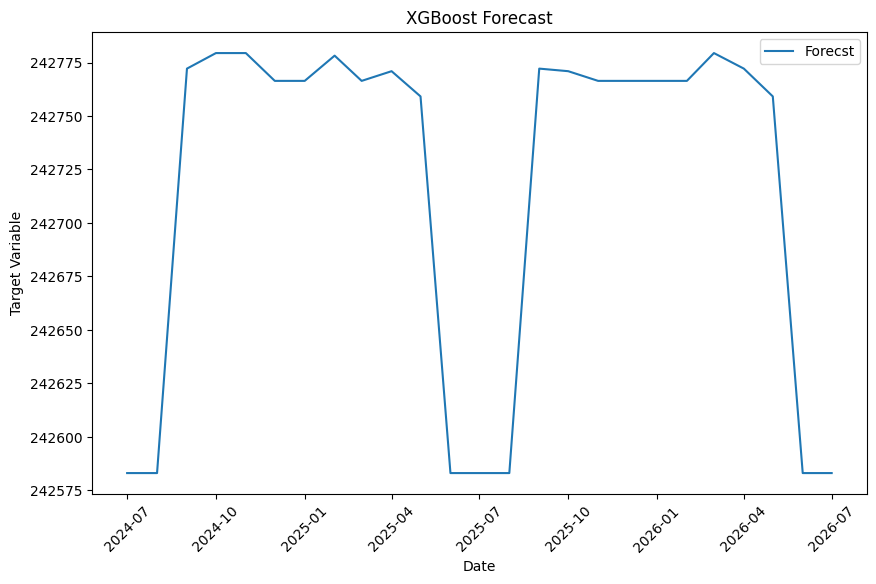

In [179]:

# Plot predicted values
plt.figure(figsize=(10,6))
plt.plot(future_dates[:25], future_predictions, label='Forecst')
plt.legend()
plt.title("XGBoost Forecast")
plt.xlabel("Date")
plt.ylabel("Target Variable")
plt.xticks(rotation=45)
plt.show()

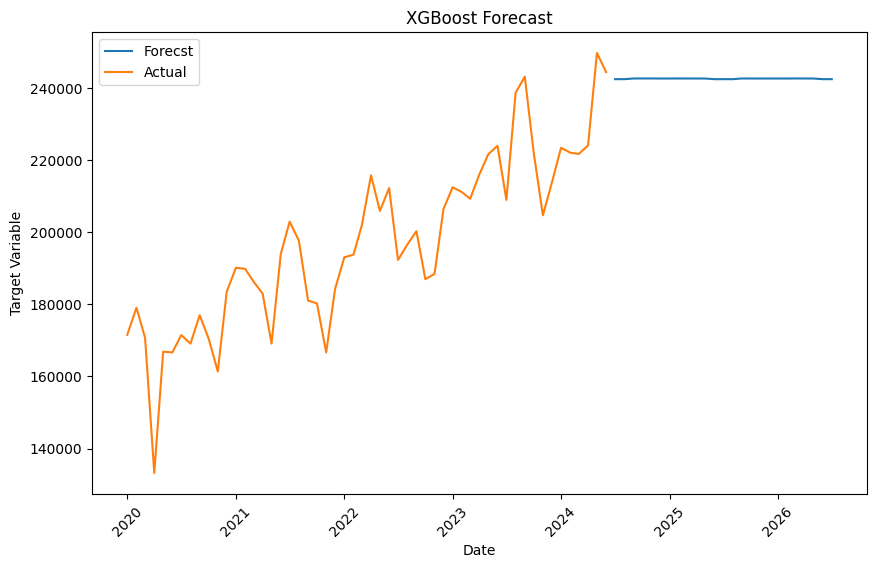

In [180]:

# Plot actual and predicted values
plt.figure(figsize=(10,6))
plt.plot(future_dates[:25], future_predictions, label='Forecst')
plt.plot(Data['ds'], Data['y'], label='Actual')
plt.legend()
plt.title("XGBoost Forecast")
plt.xlabel("Date")
plt.ylabel("Target Variable")
plt.xticks(rotation=45)
plt.show()

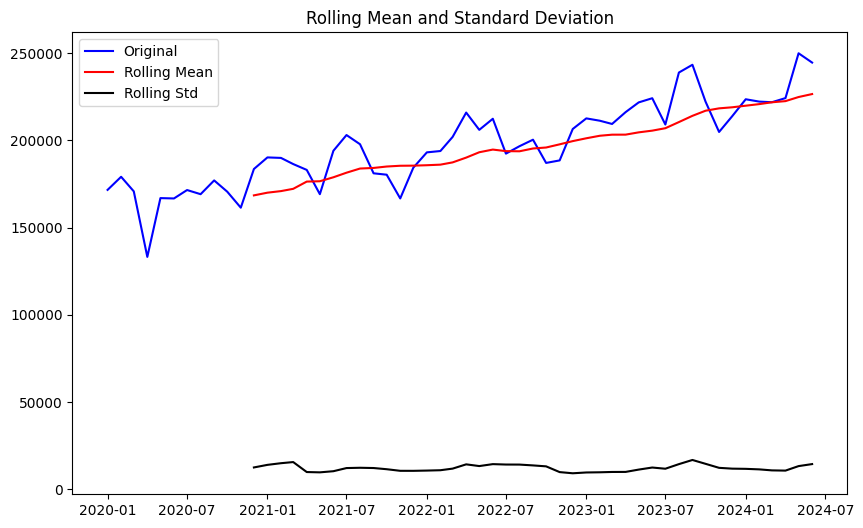

Results of Dickey-Fuller Test:
Test Statistic                 -0.033572
p-value                         0.955666
#Lags Used                     11.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64
Performing first-order differencing...


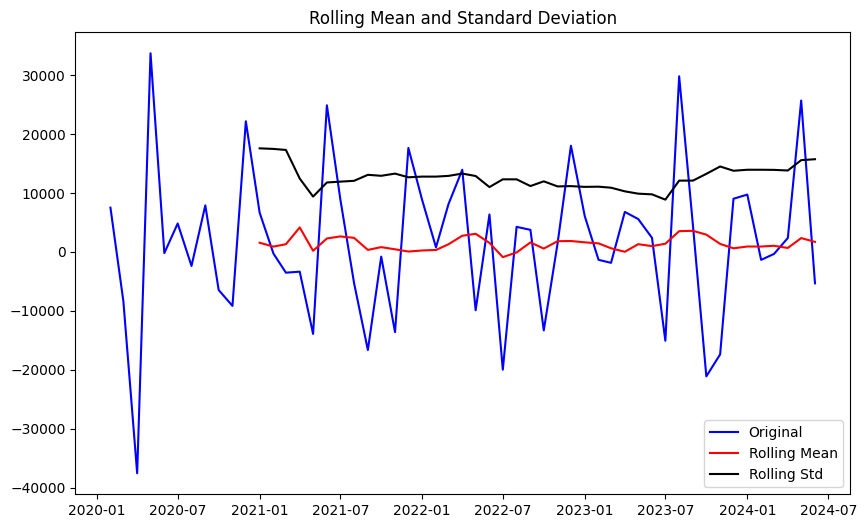

Results of Dickey-Fuller Test:
Test Statistic                 -4.167222
p-value                         0.000748
#Lags Used                     10.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


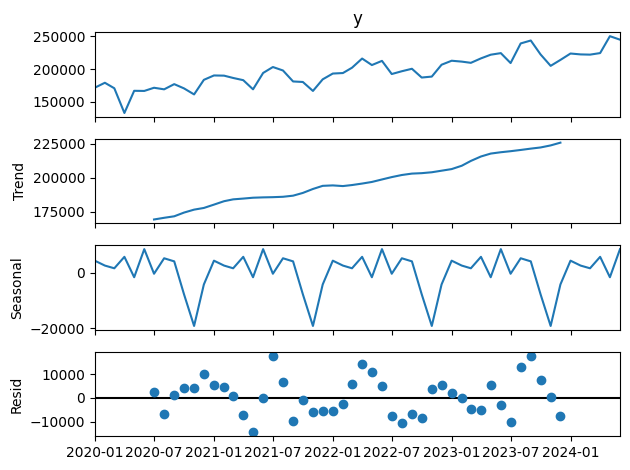

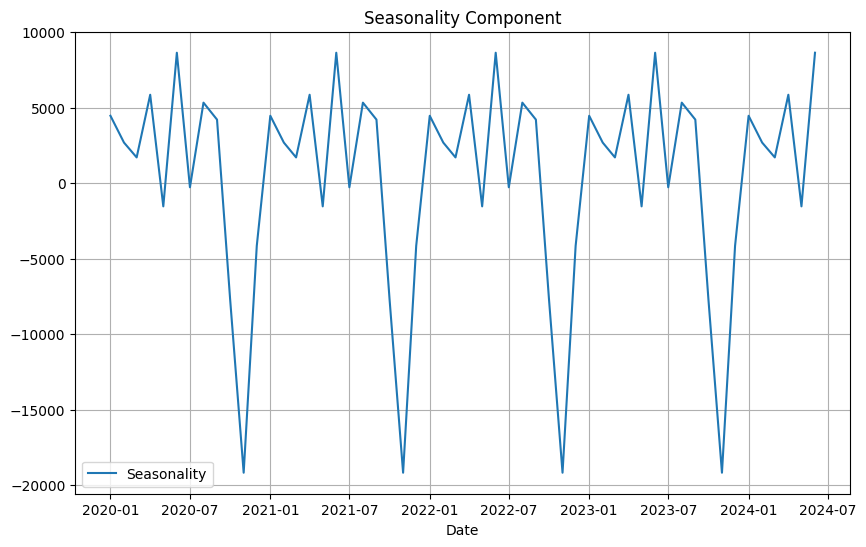

In [181]:
Power_demand=copy.deepcopy(Data)
Power_demand.head()
Power_demand.set_index('ds',inplace=True)

# === Check Stationarity === #
def check_stationarity(series):
    # Rolling statistics
    rolling_mean = series.rolling(window=12).mean()   # check if mean is not varying
    rolling_std = series.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(series, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.title("Rolling Mean and Standard Deviation")
    plt.legend(loc='best')
    plt.show()

    # Augmented Dickey-Fuller Test
    print("Results of Dickey-Fuller Test:")
    adf_test = adfuller(series, autolag='AIC')
    adf_output = pd.Series(adf_test[:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adf_test[4].items():
        adf_output[f'Critical Value ({key})'] = value
    print(adf_output)



# Check stationarity of the original data
check_stationarity(Power_demand['y'])

# Differencing if data is non-stationary
if adfuller(Power_demand['y'])[1] > 0.05:
    data_diff = Power_demand['y'].diff().dropna()
    print("Performing first-order differencing...")
    check_stationarity(data_diff)

# === Check Seasonality === #
decomposition = seasonal_decompose(Power_demand['y'], model='additive', period=12)

# Plot decomposition
decomposition.plot()
plt.show()

# Seasonal, Trend, and Residuals
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

# Plot seasonality
plt.figure(figsize=(10, 6))
plt.plot(seasonal, label="Seasonality")
plt.title("Seasonality Component")
plt.xlabel("Date")
plt.legend()
plt.grid()
plt.show()

In [182]:
#Both Trend and seasonality is there

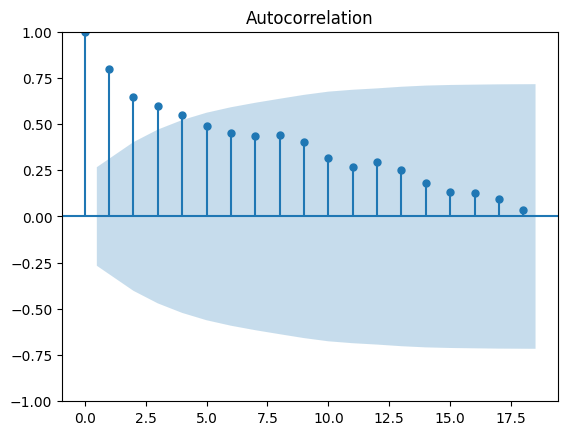

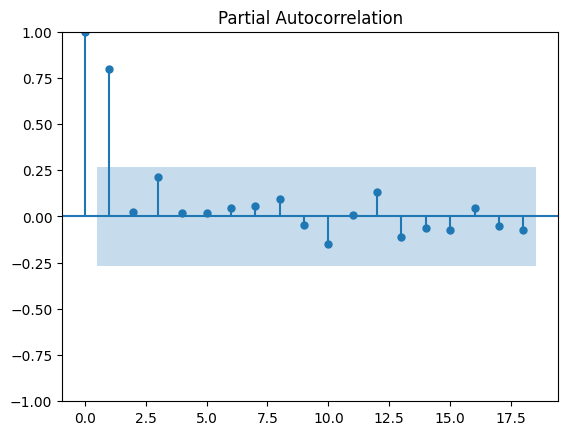

In [183]:

plot_acf(Power_demand['y'])
plot_pacf(Power_demand['y'])
plt.show()

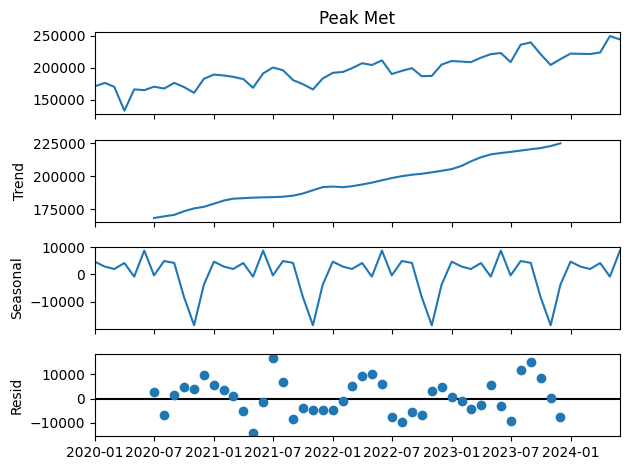

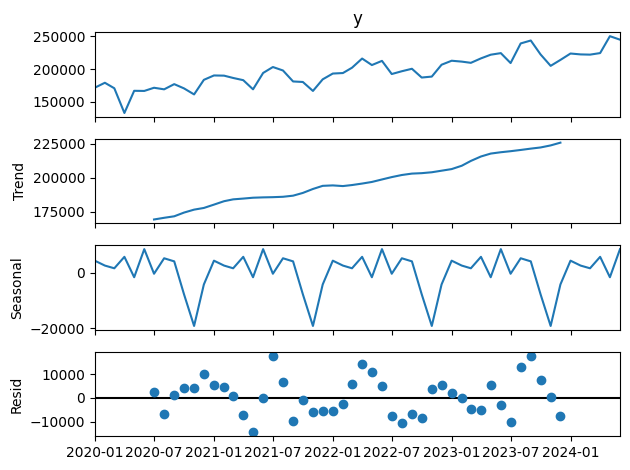

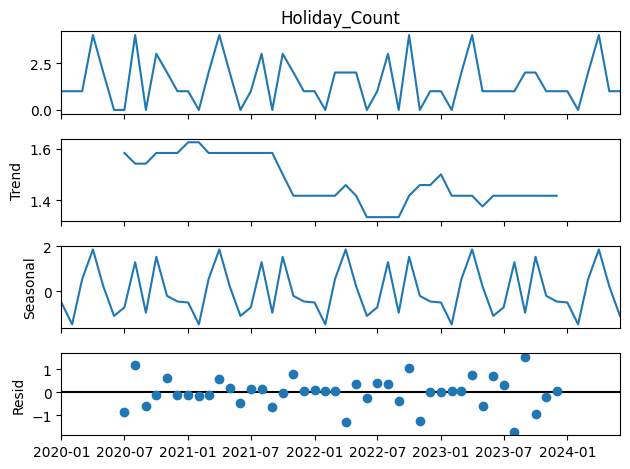

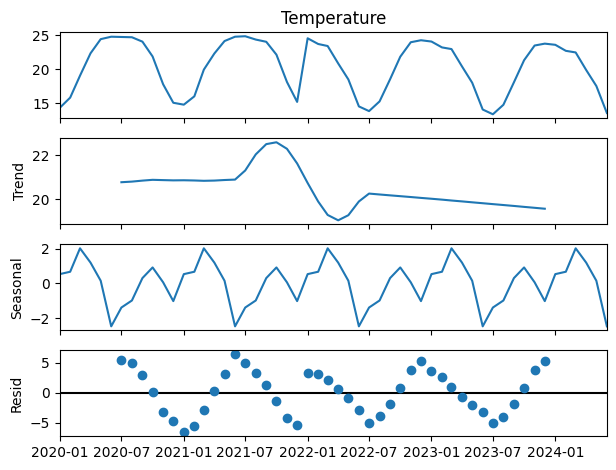

In [184]:
# === Check Seasonality === #

for i in Power_demand.columns:
    decomposition = seasonal_decompose(Power_demand[i], model='additive', period=12)
    decomposition.plot()
    plt.show()
    
    # Seasonal, Trend, and Residuals
    
    seasonal = decomposition.seasonal
    trend = decomposition.trend
    residual = decomposition.resid


In [185]:
# Seasonal Differencing
Power_demand['Seasonal_Diff_y'] = Power_demand['y'].diff(12)
Power_demand['Seasonal_Diff_PeakMet'] = Power_demand['Peak Met'].diff(12)
Power_demand['Seasonal_Diff_Temp'] = Power_demand['Temperature'].diff(12)


for n in Power_demand.columns:
   #print(n)
   print(n,adfuller(Power_demand[n].dropna())[1] ) #if>0.05 then non stationary



Peak Met 0.9730954812667444
y 0.9556660995072696
Holiday_Count 0.530506152883497
Temperature 2.0258972522513914e-05
Seasonal_Diff_y 0.0016455055028906415
Seasonal_Diff_PeakMet 0.0020204004166057294
Seasonal_Diff_Temp 0.003462840233677954


In [186]:
Power_demand['logg']=np.log(Power_demand['Holiday_Count']+1).diff(1)
print(adfuller(Power_demand['logg'].dropna())[1])

0.0011344128976440956


In [187]:
Power_demand.head()

,Peak Met,y,Holiday_Count,Temperature,Seasonal_Diff_y,Seasonal_Diff_PeakMet,Seasonal_Diff_Temp,logg
ds,,,,,,,,
2020-01-01,170976.085205,171592.173352,1,14.30,NaN,NaN,NaN,NaN
2020-02-01,176387.563477,179098.259477,1,15.82,NaN,NaN,NaN,0.000000
2020-03-01,170164.931030,170748.586297,1,19.06,NaN,NaN,NaN,0.000000
2020-04-01,132733.183350,133200.290550,4,22.36,NaN,NaN,NaN,0.916291
2020-05-01,166225.394775,166889.674773,2,24.45,NaN,NaN,NaN,-0.510826


In [188]:
Power_demand_SARIMA=Power_demand.drop(['Peak Met','y','Holiday_Count','Temperature'],axis=1)
Power_demand_SARIMA.head()

,Seasonal_Diff_y,Seasonal_Diff_PeakMet,Seasonal_Diff_Temp,logg
ds,,,,
2020-01-01,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,0.000000
2020-03-01,NaN,NaN,NaN,0.000000
2020-04-01,NaN,NaN,NaN,0.916291
2020-05-01,NaN,NaN,NaN,-0.510826


In [189]:
for n in Power_demand_SARIMA.columns:
   #print(n)
   print(n,adfuller(Power_demand_SARIMA[n].dropna())[1] ) #if>0.05 then non stationary

Seasonal_Diff_y 0.0016455055028906415
Seasonal_Diff_PeakMet 0.0020204004166057294
Seasonal_Diff_Temp 0.003462840233677954
logg 0.0011344128976440956


                                     SARIMAX Results                                      
Dep. Variable:                    Seasonal_Diff_y   No. Observations:                   29
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -180.083
Date:                            Tue, 10 Dec 2024   AIC                            370.166
Time:                                    14:25:13   BIC                            374.029
Sample:                                01-01-2021   HQIC                           370.363
                                     - 05-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3153      1.118      0.282      0.778      -1.876       2.507
ma.L1         -0.8896      0.870   

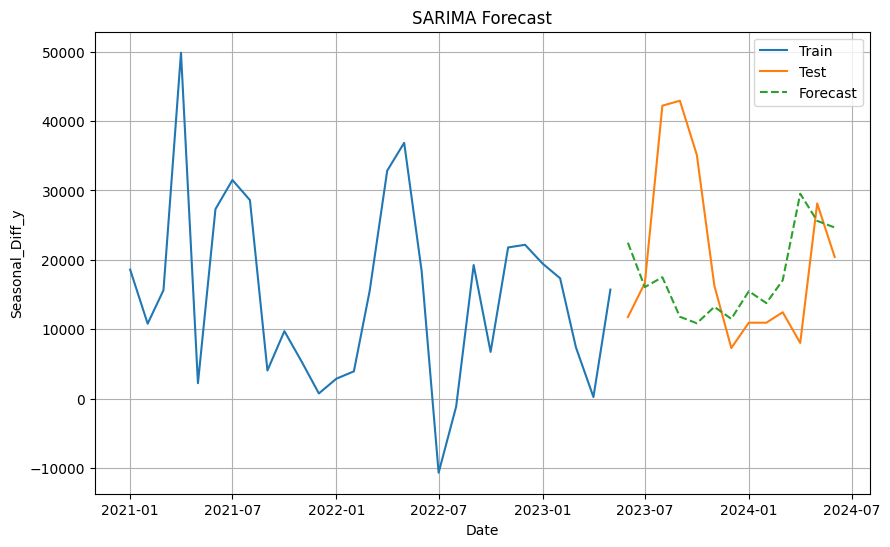

Mean Absolute Error (MAE): 10678.99
Root Mean Squared Error (RMSE): 14790.40


In [190]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


max_lags = Power_demand.shape[1] // 2

# ACF and PACF Plots for p and q determination
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#dropna

Power_demand_SARIMA=Power_demand_SARIMA.dropna()

# Set SARIMA parameters (based on ACF/PACF or trial-and-error)
p, d, q = 1, 1, 1  # Regular ARIMA terms
P, D, Q, m = 1, 1, 1, 12  # Seasonal terms (m=12 for yearly seasonality)

# Train-Test Split
train_size = int(len(Power_demand_SARIMA) * 0.7)
train = Power_demand_SARIMA.iloc[:train_size]
test = Power_demand_SARIMA.iloc[train_size:]

# Fit SARIMA model
model = SARIMAX(train['Seasonal_Diff_y'], 
                order=(p, d, q), 
                seasonal_order=(P, D, Q, m))

sarima_result = model.fit()
print(sarima_result.summary())

# Forecast
forecast_steps = len(test)
forecast = sarima_result.forecast(steps=forecast_steps)
forecast_index = test.index

# Plot Actual vs Forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Seasonal_Diff_y'], label='Train')
plt.plot(test.index, test['Seasonal_Diff_y'], label='Test')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title("SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Seasonal_Diff_y")
plt.grid()
plt.show()

# Evaluate model performance
mae = mean_absolute_error(test['Seasonal_Diff_y'], forecast)
rmse = np.sqrt(mean_squared_error(test['Seasonal_Diff_y'], forecast))
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Error for params: (2, 0, 1, 2, 0, 2, 12) - LU decomposition error.
Best model based on AIC:
p           0.000000
d           1.000000
q           2.000000
P           0.000000
D           1.000000
Q           1.000000
m          12.000000
AIC       364.309053
BIC       367.399408
RMSE    15187.770013
Name: 94, dtype: float64

Best model based on BIC:
p           0.000000
d           1.000000
q           2.000000
P           0.000000
D           1.000000
Q           1.000000
m          12.000000
AIC       364.309053
BIC       367.399408
RMSE    15187.770013
Name: 94, dtype: float64

Best model based on RMSE:
p           0.000000
d           1.000000
q           0.000000
P           1.000000
D           0.000000
Q           1.000000
m          12.000000
AIC       628.203758
BIC       632.200372
RMSE    11617.788360
Name: 61, dtype: float64


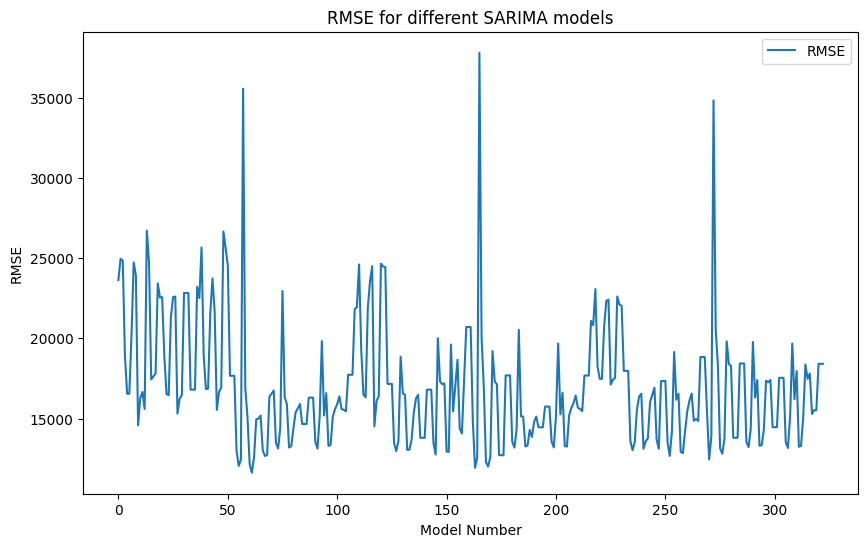

In [191]:
p_values = [0, 1, 2]  # AR terms
d_values = [0, 1]  # Differencing terms
q_values = [0, 1, 2]  # MA terms
P_values = [0, 1, 2]  # Seasonal AR terms
D_values = [0, 1]  # Seasonal differencing terms
Q_values = [0, 1, 2]  # Seasonal MA terms
m_values = [12]  # Seasonal period (12 for monthly data with yearly seasonality)

# Store results for comparison
results = []

# Loop through all combinations of p, d, q, P, D, Q, m
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for m in m_values:
                            try:
                                # Fit SARIMA model
                                model = SARIMAX(train['Seasonal_Diff_y'],
                                                order=(p, d, q),
                                                seasonal_order=(P, D, Q, m))
                                sarima_result = model.fit(disp=False)
                                
                                # Forecast the test set
                                forecast_steps = len(test)
                                forecast = sarima_result.forecast(steps=forecast_steps)
                                
                                # Calculate AIC, BIC, and RMSE
                                aic = sarima_result.aic
                                bic = sarima_result.bic
                                
                                # Calculate RMSE
                                rmse = np.sqrt(mean_squared_error(test['Seasonal_Diff_y'], forecast))
                                
                                # Store the results
                                results.append([p, d, q, P, D, Q, m, aic, bic, rmse])
                            except Exception as e:
                                print(f"Error for params: {(p, d, q, P, D, Q, m)} - {e}")

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'P', 'D', 'Q', 'm', 'AIC', 'BIC', 'RMSE'])

# Find the best parameters based on AIC, BIC, and RMSE
best_aic_model = results_df.loc[results_df['AIC'].idxmin()]
best_bic_model = results_df.loc[results_df['BIC'].idxmin()]
best_rmse_model = results_df.loc[results_df['RMSE'].idxmin()]

# Print the best models
print("Best model based on AIC:")
print(best_aic_model)

print("\nBest model based on BIC:")
print(best_bic_model)

print("\nBest model based on RMSE:")
print(best_rmse_model)

# Optional: Plot RMSE across different models for better visualization
plt.figure(figsize=(10, 6))
plt.plot(results_df['RMSE'], label='RMSE')
plt.title("RMSE for different SARIMA models")
plt.xlabel("Model Number")
plt.ylabel("RMSE")
plt.legend()
plt.show()